# Students Dropout Prediction

## Data Analysis

In [739]:
# Install dependencies

!pip install yellowbrick
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 2.3 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 2.2 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=1e7a916136a0faba6b63c1e4e95184bfa38177388eaa47e9ff791caf75553b80
  Stored in directory: /Users/lorraynereis/Library/Caches/pip/wheels/e0/e4/92/b2763717e9a525c427c049221a2fa8fa4d0ec6190bfc587fc8
Successfully built eli5


In [650]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import tree
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.dummy import DummyClassifier
from sklearn.metrics import mean_squared_error
from yellowbrick.classifier import ClassificationReport

In [651]:
# Import dataset

df = pd.read_csv("./Dataset/data.csv", sep=";")

In [652]:
# Check dataset shape

df.shape

(4424, 37)

In [653]:
# Print first 5 rows

df.head()

Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1                      37   
3                           122.0            1                      38   
4                           100.0            1                      37   

   Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                      12  ...                                    0   
1                       3  ...                                    0   
2                      37  ...                                    0   
3                      37  ...                                    0   
4                      38  ...                                    0   

   Curricular units 2nd sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

In [654]:
# Dataset info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [655]:
# Descriptive Statistics 

df.describe().transpose()

count         mean  \
Marital status                                  4424.0     1.178571   
Application mode                                4424.0    18.669078   
Application order                               4424.0     1.727848   
Course                                          4424.0  8856.642631   
Daytime/evening attendance\t                    4424.0     0.890823   
Previous qualification                          4424.0     4.577758   
Previous qualification (grade)                  4424.0   132.613314   
Nacionality                                     4424.0     1.873192   
Mother's qualification                          4424.0    19.561935   
Father's qualification                          4424.0    22.275316   
Mother's occupation                             4424.0    10.960895   
Father's occupation                             4424.0    11.032324   
Admission grade                                 4424.0   126.978119   
Displaced                                       4424.0     0.548373   
Educational special needs                       4424.0     0.011528   
Debtor                                          4424.0     0.113698   
Tuition fees up to date                         4424.0     0.880651   
Gender                                          4424.0     0.351718   
Scholarship holder                              4424.0     0.248418   
Age at enrollment                               4424.0    23.265145   
International                                   4424.0     0.024864   
Curricular units 1st sem (credited)             4424.0     0.709991   
Curricular units 1st sem (enrolled)             4424.0     6.270570   
Curricular units 1st sem (evaluations)          4424.0     8.299051   
Curricular units 1st sem (approved)             4424.0     4.706600   
Curricular units 1st sem (grade)                4424.0    10.640822   
Curricular units 1st sem (without evaluations)  4424.0     0.137658   
Curricular units 2nd sem (credited)             4424.0     0.541817   
Curricular units 2nd sem (enrolled)             4424.0     6.232143   
Curricular units 2nd sem (evaluations)          4424.0     8.063291   
Curricular units 2nd sem (approved)             4424.0     4.435805   
Curricular units 2nd sem (grade)                4424.0    10.230206   
Curricular units 2nd sem (without evaluations)  4424.0     0.150316   
Unemployment rate                               4424.0    11.566139   
Inflation rate                                  4424.0     1.228029   
GDP                                             4424.0     0.001969   

                                                        std    min      25%  \
Marital status                                     0.605747   1.00     1.00   
Application mode                                  17.484682   1.00     1.00   
Application order                                  1.313793   0.00     1.00   
Course                                          2063.566416  33.00  9085.00   
Daytime/evening attendance\t                       0.311897   0.00     1.00   
Previous qualification                            10.216592   1.00     1.00   
Previous qualification (grade)                    13.188332  95.00   125.00   
Nacionality                                        6.914514   1.00     1.00   
Mother's qualification                            15.603186   1.00     2.00   
Father's qualification                            15.343108   1.00     3.00   
Mother's occupation                               26.418253   0.00     4.00   
Father's occupation                               25.263040   0.00     4.00   
Admission grade                                   14.482001  95.00   117.90   
Displaced                                          0.497711   0.00     0.00   
Educational special needs                          0.106760   0.00     0.00   
Debtor                                             0.317480   0.00     0.00   
Tuition fees up to date                            0.324235   0.00     1.00   

In [656]:
# Check  missing values

df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

From this it is clear that there are no null values in the dataset. 

In [657]:
# Columns in the dataset

print(df.columns)

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [658]:
# Remove single quotation and tab character from column names

df.columns.str.strip()
df.columns = df.columns.str.replace("'", "").str.replace("\t", "")

In [659]:
# Rename all the columns with underscore

df.rename(columns = {
    'Marital status': 'marital_status',
    'Application mode': 'application_mode',
    'Application order': 'application_order',
    'Course': 'course',
    'Daytime/evening attendance': 'daytime_evening_attendance',
    'Previous qualification': 'previous_qualification',
    'Previous qualification (grade)': 'previous_qualification_grade',
    'Nacionality': 'nacionality',
    'Mothers qualification': 'mothers_qualification',
    'Fathers qualification': 'fathers_qualification',
    'Mothers occupation': 'mothers_occupation',
    'Fathers occupation': 'fathers_occupation',
    'Admission grade': 'admission_grade',
    'Displaced': 'displaced',
    'Educational special needs': 'educational_special_needs',
    'Debtor': 'debtor',
    'Tuition fees up to date': 'tuition_fees_up_to_date',
    'Gender': 'gender',
    'Scholarship holder': 'scholarship_holder',
    'Age at enrollment': 'age_at_enrollment',
    'International': 'international',
    'Curricular units 1st sem (credited)': 'curricular_units_1st_sem_credited',
    'Curricular units 1st sem (enrolled)': 'curricular_units_1st_sem_enrolled',
    'Curricular units 1st sem (evaluations)': 'curricular_units_1st_sem_evaluations',
    'Curricular units 1st sem (approved)': 'curricular_units_1st_sem_approved',
    'Curricular units 1st sem (grade)': 'curricular_units_1st_sem_grade',
    'Curricular units 1st sem (without evaluations)': 'curricular_units_1st_sem_without_evaluations',
    'Curricular units 2nd sem (credited)': 'curricular_units_2nd_sem_credited',
    'Curricular units 2nd sem (enrolled)': 'curricular_units_2nd_sem_enrolled',
    'Curricular units 2nd sem (evaluations)': 'curricular_units_2nd_sem_evaluations',
    'Curricular units 2nd sem (approved)': 'curricular_units_2nd_sem_approved',
    'Curricular units 2nd sem (grade)': 'curricular_units_2nd_sem_grade',
    'Curricular units 2nd sem (without evaluations)': 'curricular_units_2nd_sem_without_evaluations',
    'Unemployment rate': 'unemployment_rate',
    'Inflation rate': 'inflation_rate',
    'GDP': 'gdp',
    'Target': 'target'
}, inplace=True)


In [660]:
# Define categorical and numerical columns

categorical_columns = ['marital_status','application_mode', 'application_order', 'course', 'daytime_evening_attendance','previous_qualification','nacionality',
                       'mothers_qualification','fathers_occupation', 'displaced', 'educational_special_needs','debtor','tuition_fees_up_to_date','gender','scholarship_holder','international']




numerical_columns = ['previous_qualification_grade','admission_grade', 'age_at_enrollment','curricular_units_1st_sem_credited','curricular_units_1st_sem_enrolled',
                     'curricular_units_1st_sem_evaluations','curricular_units_1st_sem_approved','curricular_units_1st_sem_grade','curricular_units_1st_sem_without_evaluations',
                     'curricular_units_2nd_sem_credited','curricular_units_2nd_sem_enrolled', 'curricular_units_2nd_sem_evaluations','curricular_units_2nd_sem_approved',
                     'curricular_units_2nd_sem_grade', 'curricular_units_2nd_sem_without_evaluations','unemployment_rate','inflation_rate', 'gdp' ]

In [661]:
# Transform datatype to object

for col in categorical_columns:
  df[col] = df[col].astype('object')

In [662]:
# Check for duplicates

df.duplicated().sum()

0

So from the dataset, there is no duplicate values. 

In [663]:
# Count unique values in Categorical columns

for col in categorical_columns:
  print(col + "---" + str(df[col].nunique()))

marital_status---6
application_mode---18
application_order---8
course---17
daytime_evening_attendance---2
previous_qualification---17
nacionality---21
mothers_qualification---29
fathers_occupation---46
displaced---2
educational_special_needs---2
debtor---2
tuition_fees_up_to_date---2
gender---2
scholarship_holder---2
international---2


In [664]:
# Verify target unique values

df['target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [665]:
# Frequency of occurences of classes

df['target'].value_counts()

target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

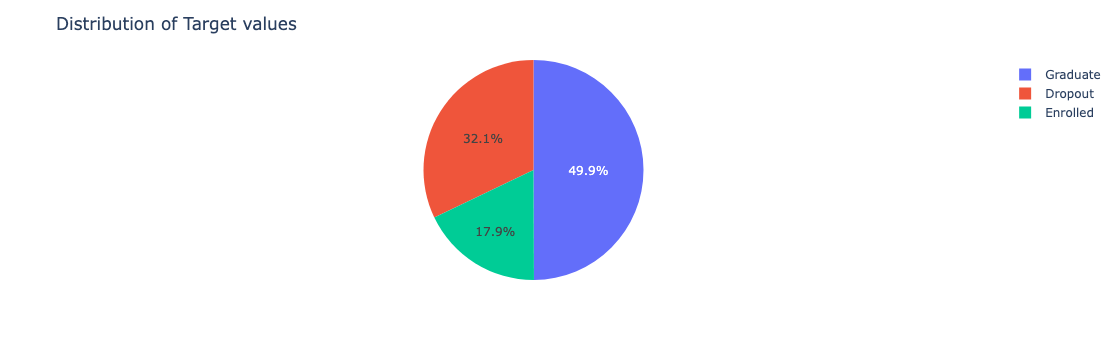

In [666]:
# Distribution of target values

target_value_counts = df['target'].value_counts()

distribution = px.pie(values= target_value_counts,
             names= target_value_counts.index.to_list())

distribution.update_layout(title="Distribution of Target values")
distribution.show()

# Saving the plot 
distribution.write_image("./images/Distribution_of_Target_values.png")

In [667]:
# Drop 'Enrolled' status

df = df[df.target != 'Enrolled']

In [668]:
target_value_counts = df['target'].value_counts()

target_value_counts

target
Graduate    2209
Dropout     1421
Name: count, dtype: int64

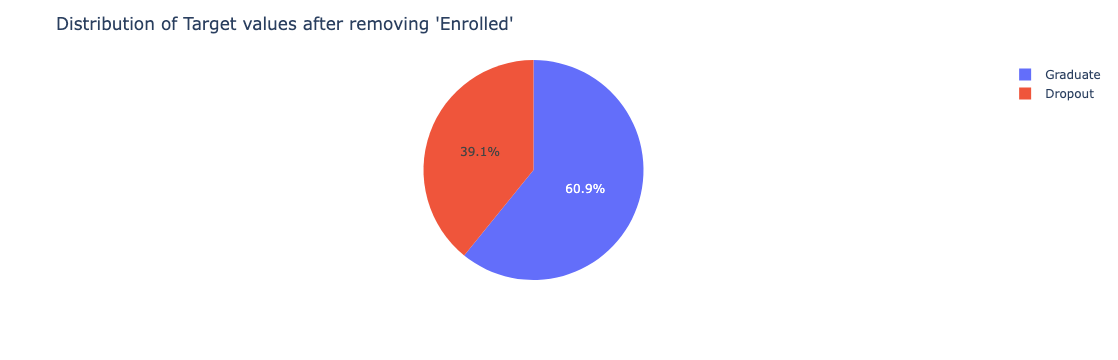

In [669]:
# Distribution of target values after removing 'Enrolled'.

target_value_counts = df['target'].value_counts()

distribution = px.pie(values=target_value_counts,
                      names=target_value_counts.index.to_list())

distribution.update_layout(title="Distribution of Target values after removing 'Enrolled'")
distribution.show()

# Saving the plot
distribution.write_image("./images/Distribution_of_Target_values_after_modification.png")

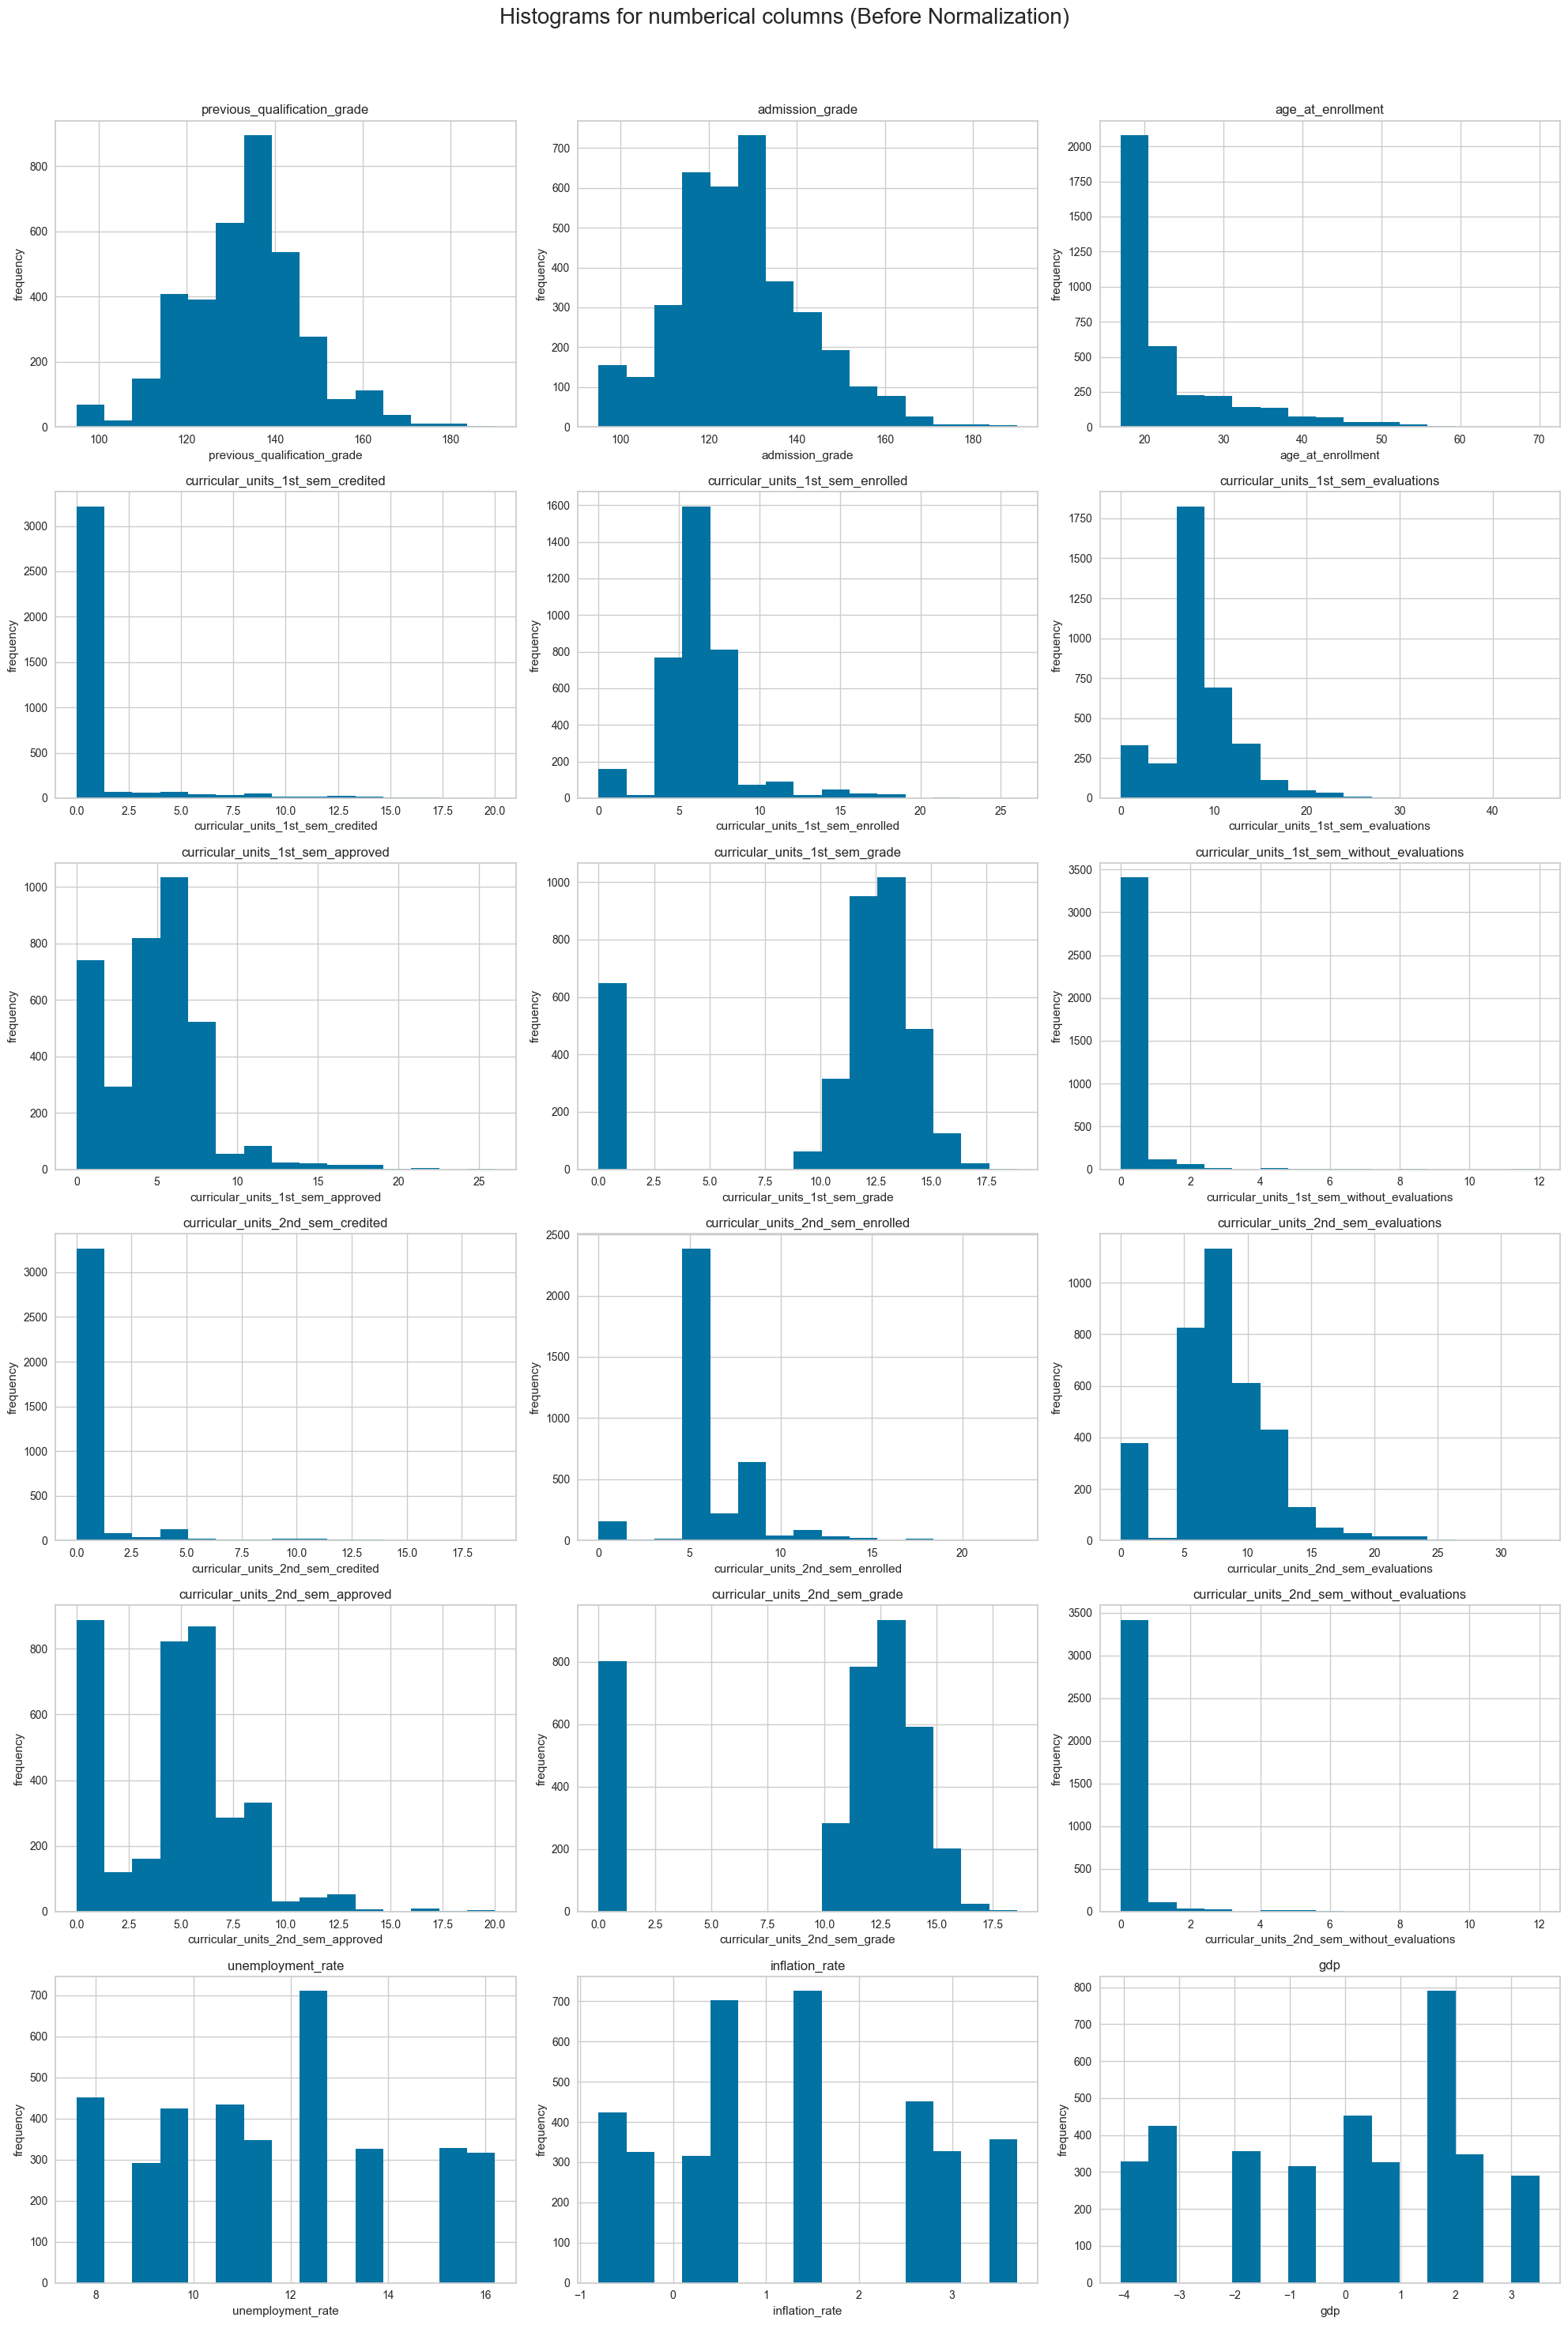

<Figure size 800x550 with 0 Axes>

In [670]:
# Visualize distribution of numberical columns

fig, axes = plt.subplots(6, 3, figsize=(20, 30))
fig.suptitle(
    "Histograms for numberical columns (Before Normalization)", fontsize=20)


axes = axes.flatten()


for i, col in enumerate(numerical_columns):
    axes[i].hist(df[col], bins=15)
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(f"{col}")
    axes[i].set_ylabel("frequency")


plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

plt.savefig("./images/Histograms_for_numberical_columns_Before_Normalization.png")

In [671]:
# Define key value pair to understand data relations

data_copy = df.copy()
for col in categorical_columns:
    if col == 'marital_status':
      data_copy[col] = data_copy[col].map({1: 'single', 2: 'married', 3: 'widower', 4: 'divorced', 5: 'facto union', 6: 'legally separated'})
    elif col == 'gender':
      data_copy[col] = data_copy[col].map({1: 'male', 0: 'female'})
    elif col == 'scholarship_holder':
      data_copy[col] = data_copy[col].map({1: 'yes', 0: 'no'})
    elif col == 'tuition_fees_up_to_date':
      data_copy[col] = data_copy[col].map({1: 'yes', 0: 'no'})
    elif col == 'debtor':
      data_copy[col] = data_copy[col].map({1: 'yes', 0: 'no'})
    elif col == 'tuition_fees_up_to_date':
      data_copy[col] = data_copy[col].map({1: 'yes', 0: 'no'})
    elif col =='nacionality':
      data_copy[col] = data_copy[col].map({1 :'Portuguese', 2 : 'German', 6 : 'Spanish', 11 : 'Italian', 13 : 'Dutch', 14 : 'English', 17 : 'Lithuanian', 21 : 'Angolan', 22 : 'Cape Verdean', 24 : 'Guinean', 25 : 'Mozambican', 26 : 'Santomean', 32 : 'Turkish', 41 : 'Brazilian', 62 : 'Romanian', 100 : 'Moldova (Republic of)', 101 : 'Mexican', 103 : 'Ukrainian', 105 : 'Russian', 108 : 'Cuban', 109 : 'Colombian'})
    elif col == 'course':
       data_copy[col]= data_copy[col].map({33: 'Biofuel Production Technologies', 171:'Animation and Multimedia Design', 8014:  'Social Service (evening attendance)', 9003: 'Agronomy', 9070 : 'Communication Design', 9085: 'Veterinary Nursing', 9119: 'Informatics Engineering', 9130 : 'Equinculture', 9147 : 'Management', 9238 : 'Social Service', 9254 : 'Tourism', 9500: 'Nursing', 9556 : 'Oral Hygiene', 9670 : 'Advertising and Marketing Management', 9773 : 'Journalism and Communication', 9853 : 'Basic Education', 9991 : 'Management (evening attendance)'})

### Analyse students relation

In [672]:
# Check how many students of the dataset are international and non international

data_copy['international'].value_counts()

international
0    3544
1      86
Name: count, dtype: int64

In [673]:
# Check predominance nacionality of students

data_copy.groupby('international')['nacionality'].value_counts()

international  nacionality          
0              Portuguese               3544
1              Brazilian                  32
               Cape Verdean               12
               Santomean                   9
               Spanish                     8
               Guinean                     5
               Italian                     3
               Ukrainian                   3
               German                      2
               Mexican                     2
               Moldova (Republic of)       2
               Angolan                     1
               Colombian                   1
               Dutch                       1
               English                     1
               Lithuanian                  1
               Mozambican                  1
               Romanian                    1
               Russian                     1
Name: count, dtype: int64

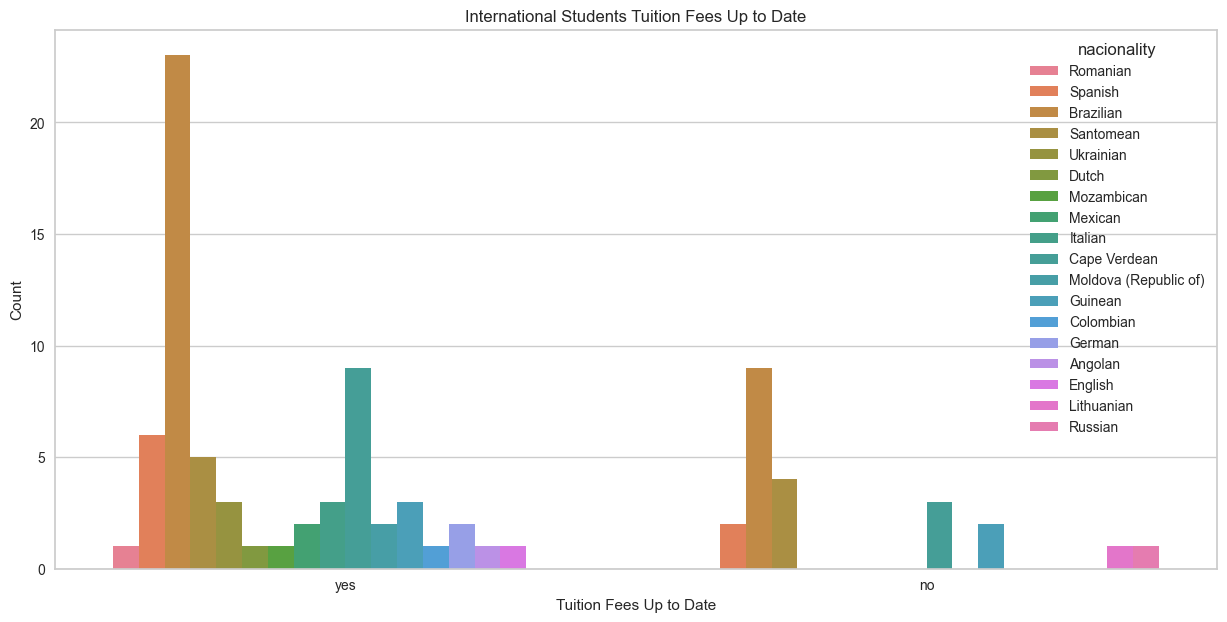

In [674]:
#  Inspect which nationalities are up to date with tuition fees

internacional_students = data_copy.query('international == 1' )

plt.figure(figsize=(15,7))

ax = sns.countplot(x ='tuition_fees_up_to_date', hue = "nacionality", data = internacional_students)
ax.set_title('International Students Tuition Fees Up to Date')
ax.set_ylabel('Count')
ax.set_xlabel('Tuition Fees Up to Date')

plt.savefig("./images/International_Students_Tuition_Fees_Up_to_Date.png")

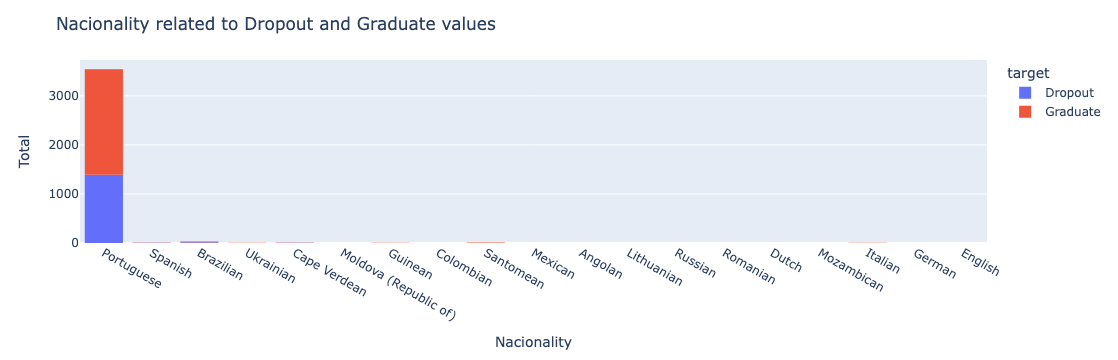

In [675]:
# Nacionality related to target values

fig = px.histogram(data_copy, x='nacionality', color="target")
fig.update_layout(
        title="Nacionality related to Dropout and Graduate values",
        xaxis_title="Nacionality",
        yaxis_title="Total")
fig.show()

# Saving the plot
fig.write_image("./images/Nacionality_related_to_Dropout_and_Graduate_values.png")

### Analyse relation beetween Gender and Unemployment rate

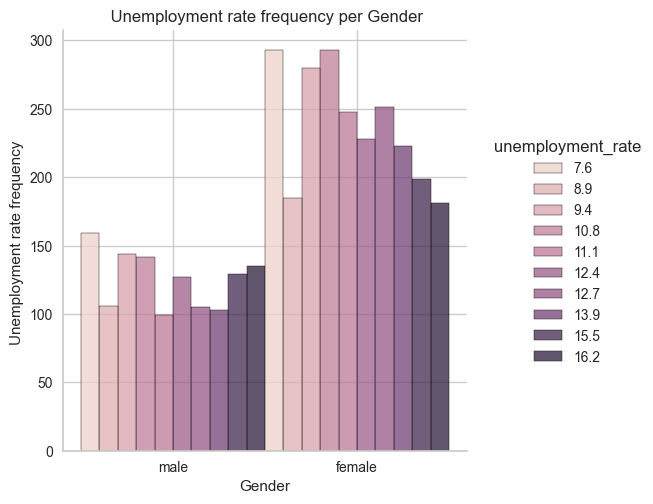

In [676]:
# Compare Unemployment rate frequency related to Gender type

sns.displot(data_copy, x="gender", hue="unemployment_rate",multiple="dodge")

plt.xlabel("Gender")
plt.ylabel("Unemployment rate frequency ")
plt.title(" Unemployment rate frequency per Gender")

plt.savefig("./images/Unemployment_rate_frequency_per_Gender.png")

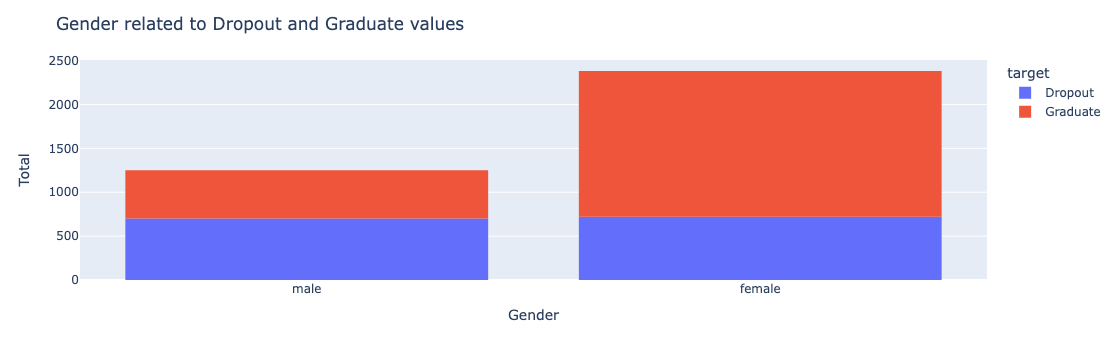

In [677]:
# Relation beetween Gender and target values 

fig = px.histogram(data_copy, x="gender", color="target")
fig.update_layout(
        title="Gender related to Dropout and Graduate values",
        xaxis_title="Gender",
        yaxis_title="Total")
fig.show()

# Saving the plot
fig.write_image("./images/Gender_related_to_Dropout_and_Graduate_values.png")

### Analyse feature courses

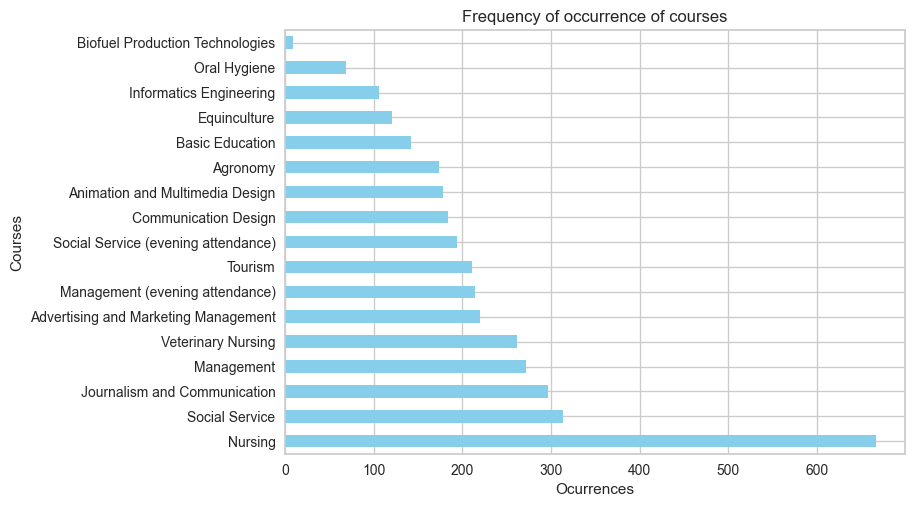

<Figure size 800x550 with 0 Axes>

In [678]:
# Verify the total occurences of students for each curse

course_value_counts = data_copy["course"].value_counts()

course_value_counts.plot(kind='barh', color='skyblue')

plt.title("Frequency of occurrence of courses")
plt.xlabel("Ocurrences")
plt.ylabel("Courses")
plt.show()

plt.savefig("./images/Frequency_of_occurrence_of_courses.png")

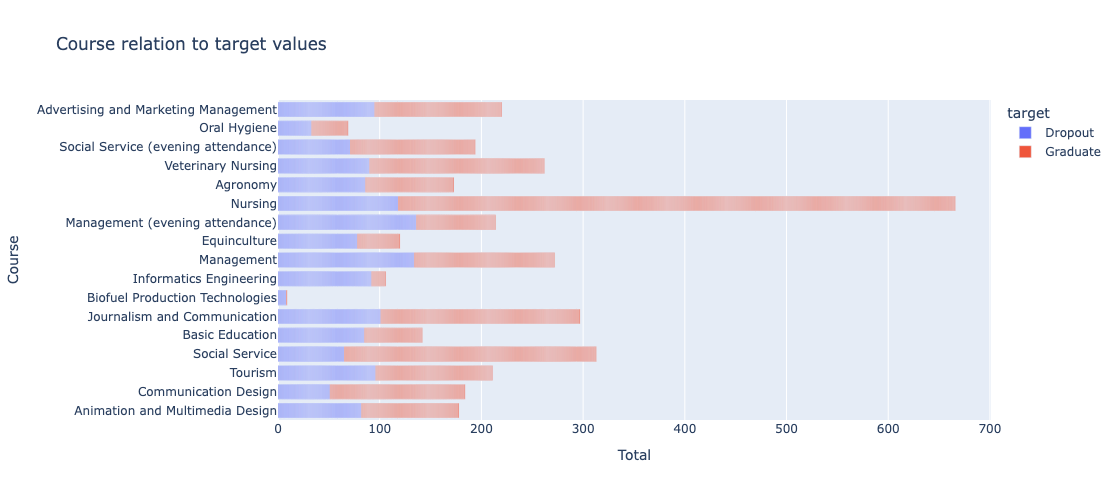

In [679]:
# Relation between Courses and target Values

fig = px.bar(data_copy, y="course",color="target", orientation='h',
            height=500,
             title='Course relation to target values')
fig.update_layout(xaxis_title="Total",
            yaxis_title="Course")
fig.show()

# Saving the plot
fig.write_image("./images/Course_relation_to_target_values.png")

### Outlier Inspection

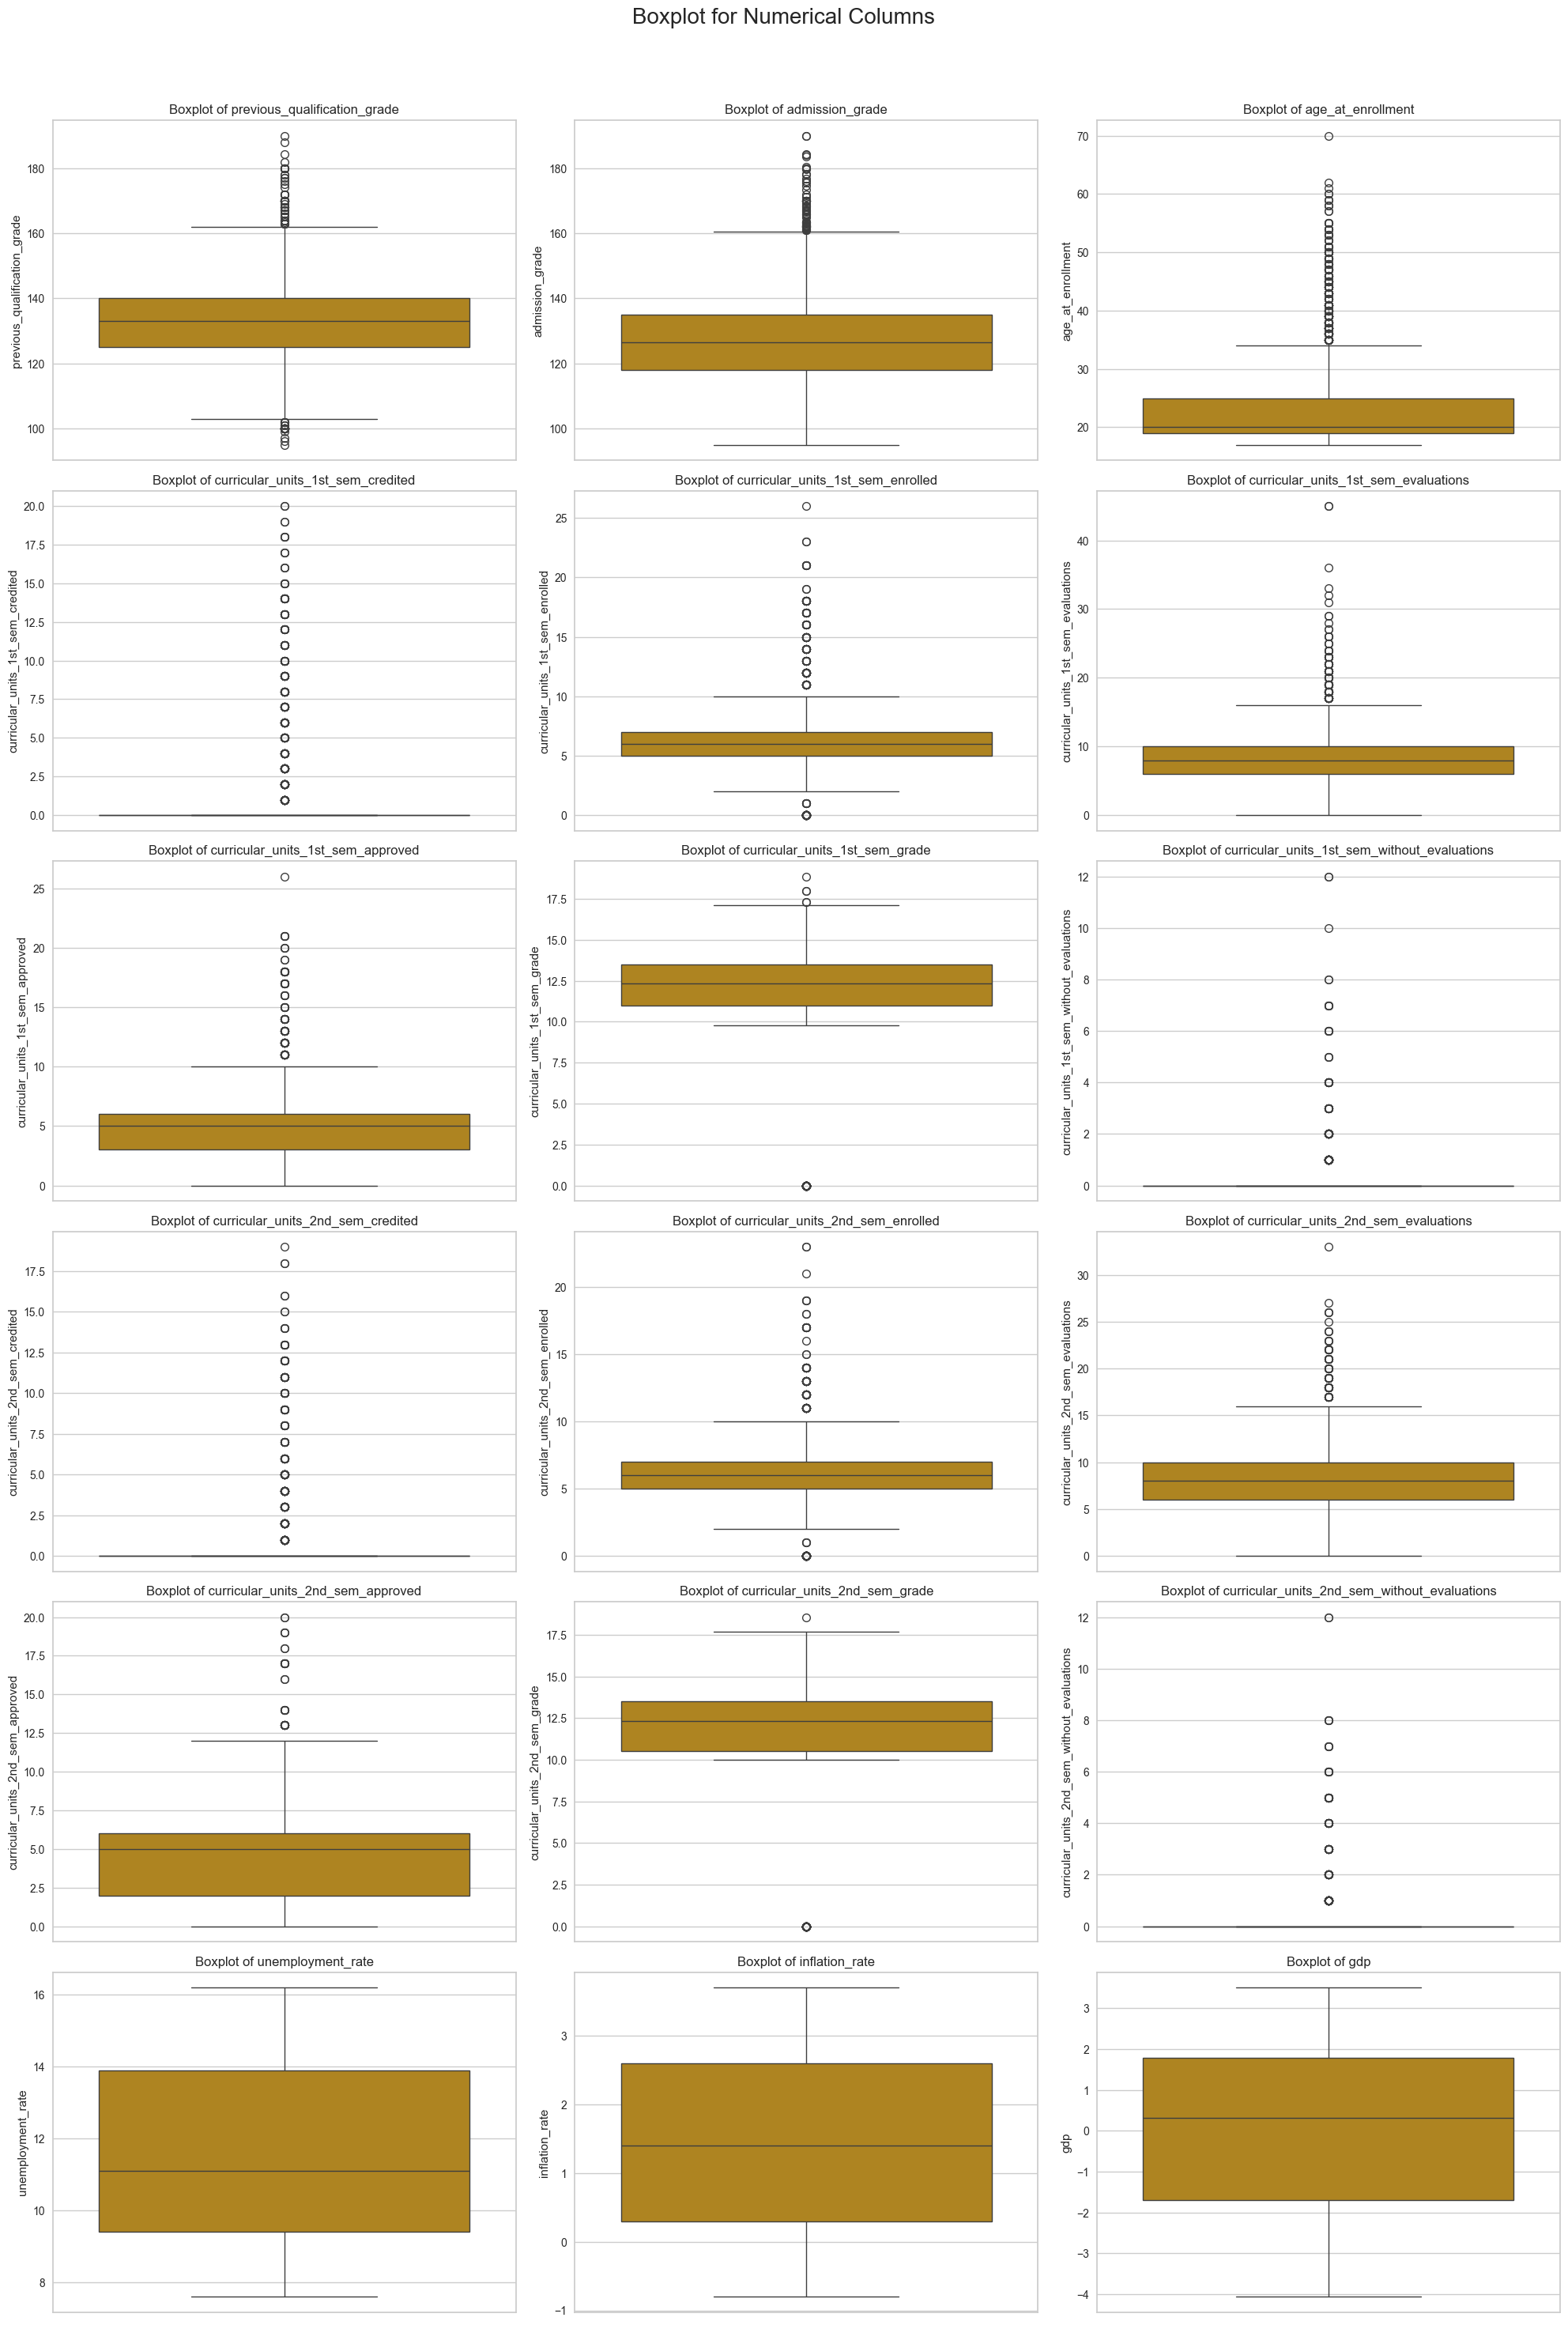

<Figure size 800x550 with 0 Axes>

In [680]:
"""
Visualize the outliers of numberical columns. 
"""

# Defining plot structure
fig, axes = plt.subplots(6, 3, figsize=(20, 30))
fig.suptitle("Boxplot for Numerical Columns", fontsize=20)

# Flattening the axes
axes = axes.flatten()

# Loop through each numerical column
for i, col in enumerate(numerical_columns):
    # Boxplot using seaborn library
    sns.boxplot(y=df[col], ax=axes[i], color="#C58E0A")
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel(col)


# Hiding the unused plots
for j in range(len(numerical_columns), len(axes)):
    axes[j].axis('off')

# Adjusting the layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

plt.savefig("./images/Boxplot_for_Numerical_Columns.png")

 ===========> Description regarding outliers

In [681]:
"""
Choosed Interquartile Range (IQR) method to remove the outliers from the dataset.
Here we are not removing the entire rows of outliers, we alter the values of outliers to the lower and upper limits.
"""

# Defining Q1, Q3 and IQR for each numerical column
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Defining lower limit and upper limit
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Removing the outliers
df_no_outliers = df.copy()
for col in numerical_columns:
    df_no_outliers[col] = df[col].clip(
        lower=lower_limit[col], upper=upper_limit[col])

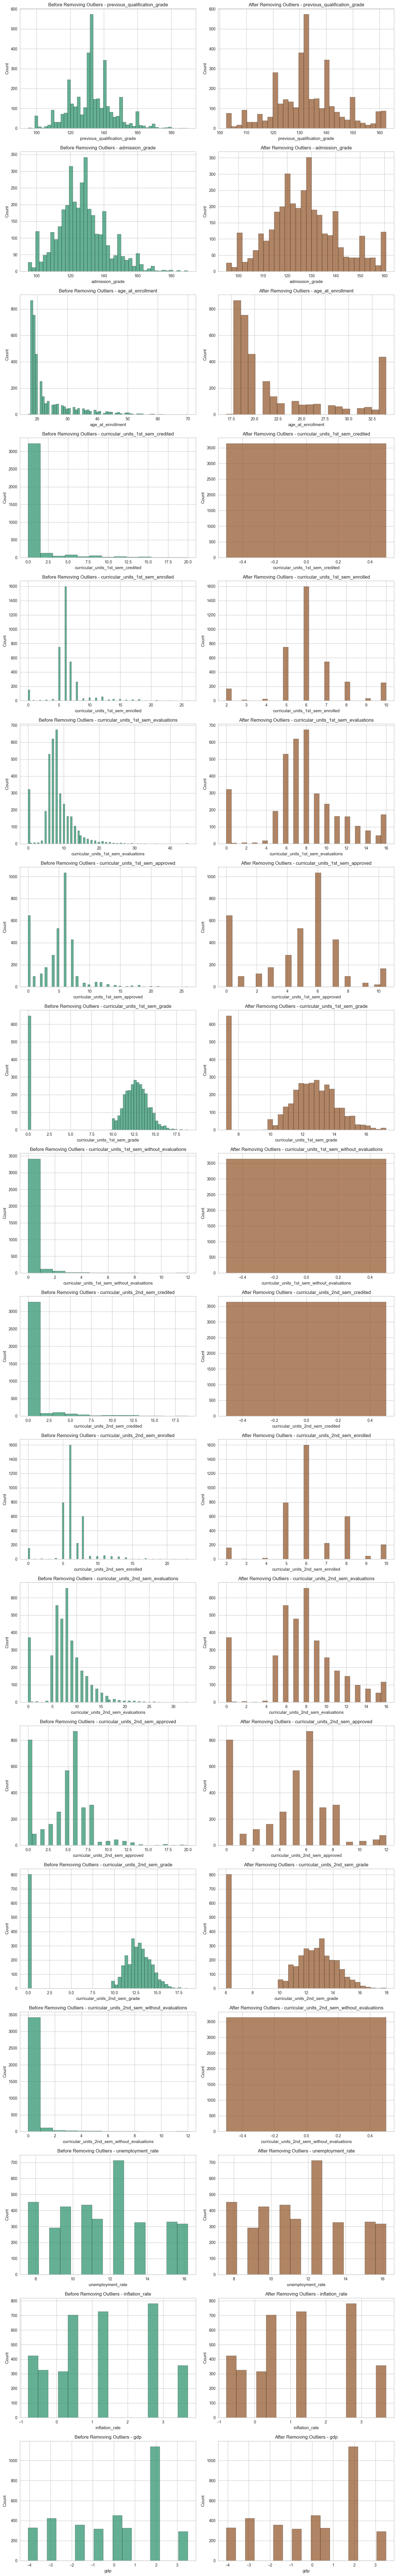

<Figure size 800x550 with 0 Axes>

In [682]:
"""
Comparing the distribution of numberical columns before and after the alternations of outliers using histograms.
"""

# Defining the plot structure
fig, axes = plt.subplots(len(numerical_columns), 2,
                         figsize=(14, 5 * len(numerical_columns)))


for i, col in enumerate(numerical_columns):
    # Before removing outliers
    sns.histplot(data=df, x=col, ax=axes[i, 0], color='#329670')
    axes[i, 0].set_title(f'Before Removing Outliers - {col}')

    # After removing outliers
    sns.histplot(data=df_no_outliers, x=col, ax=axes[i, 1], color='#965c32')
    axes[i, 1].set_title(f'After Removing Outliers - {col}')

# Adjust overlapping
plt.tight_layout()
plt.show()

plt.savefig("./images/Distribution_of_numberical_columns_before_and_after_outliers.png")

In [683]:
# Update df

df = df_no_outliers

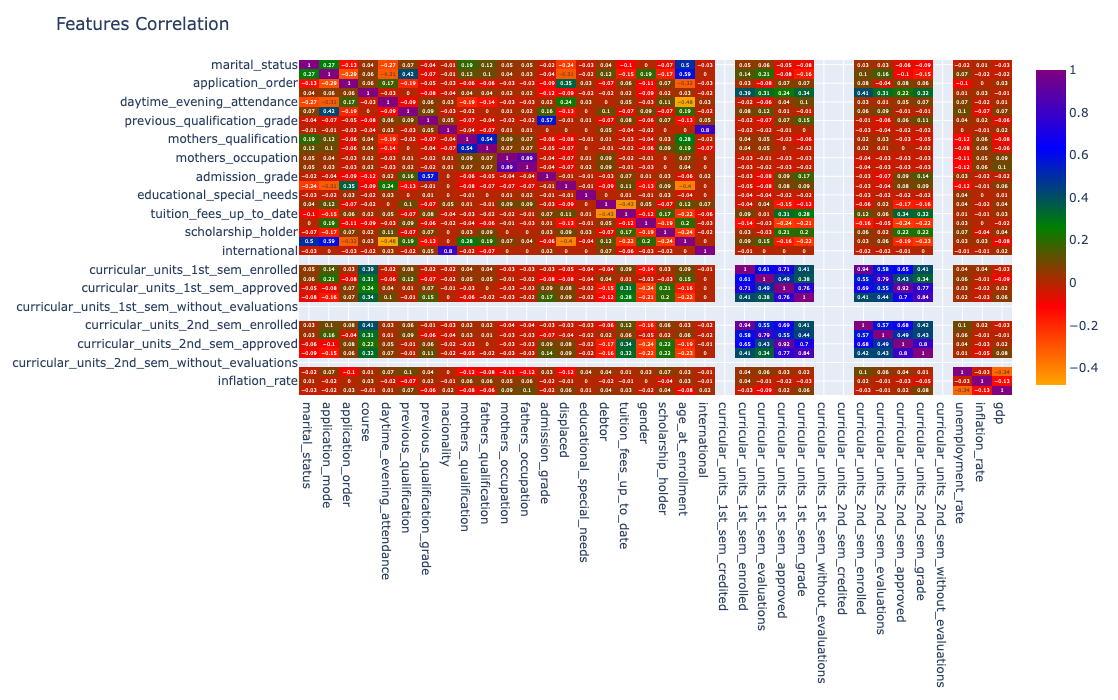

In [684]:
# Heat map showing correlation of features

heat_map_correlation = px.imshow(df.drop('target', axis = 1).corr().round(2), text_auto=True, aspect="auto", color_continuous_scale=["orange", "red", 
                                         "green", "blue",
                                         "purple"])
heat_map_correlation.update_layout(title = 'Features Correlation',height=700, width=1000)
heat_map_correlation.show()

# Saving the plot
heat_map_correlation.write_image("./images/Features_Correlation.png")

## Handling Correlation

In [685]:
# Correlation matrix
correlation_matrix = df.drop('target', axis=1).corr()

# Set a threshold
threshold = 0.85

# Select pairs with correlations above the threshold
high_corr_pairs = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(
    bool))  # Take only upper triangle to avoid duplication
high_corr_pairs = high_corr_pairs.stack().reset_index()  # Flatten the matrix
high_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_corr_pairs = high_corr_pairs[high_corr_pairs['Correlation'] > threshold]

# Display highly correlated pairs
print(high_corr_pairs)

                             Feature 1                          Feature 2  \
265                 mothers_occupation                 fathers_occupation   
444  curricular_units_1st_sem_enrolled  curricular_units_2nd_sem_enrolled   
463  curricular_units_1st_sem_approved  curricular_units_2nd_sem_approved   

     Correlation  
265     0.886568  
444     0.936048  
463     0.917537  


In [686]:
# Drop features with high correlation values

corr_columns = ["mothers_occupation", 
                "curricular_units_2nd_sem_credited",
                "curricular_units_2nd_sem_enrolled", 
                "curricular_units_2nd_sem_approved"]

df = df.drop(columns=corr_columns)

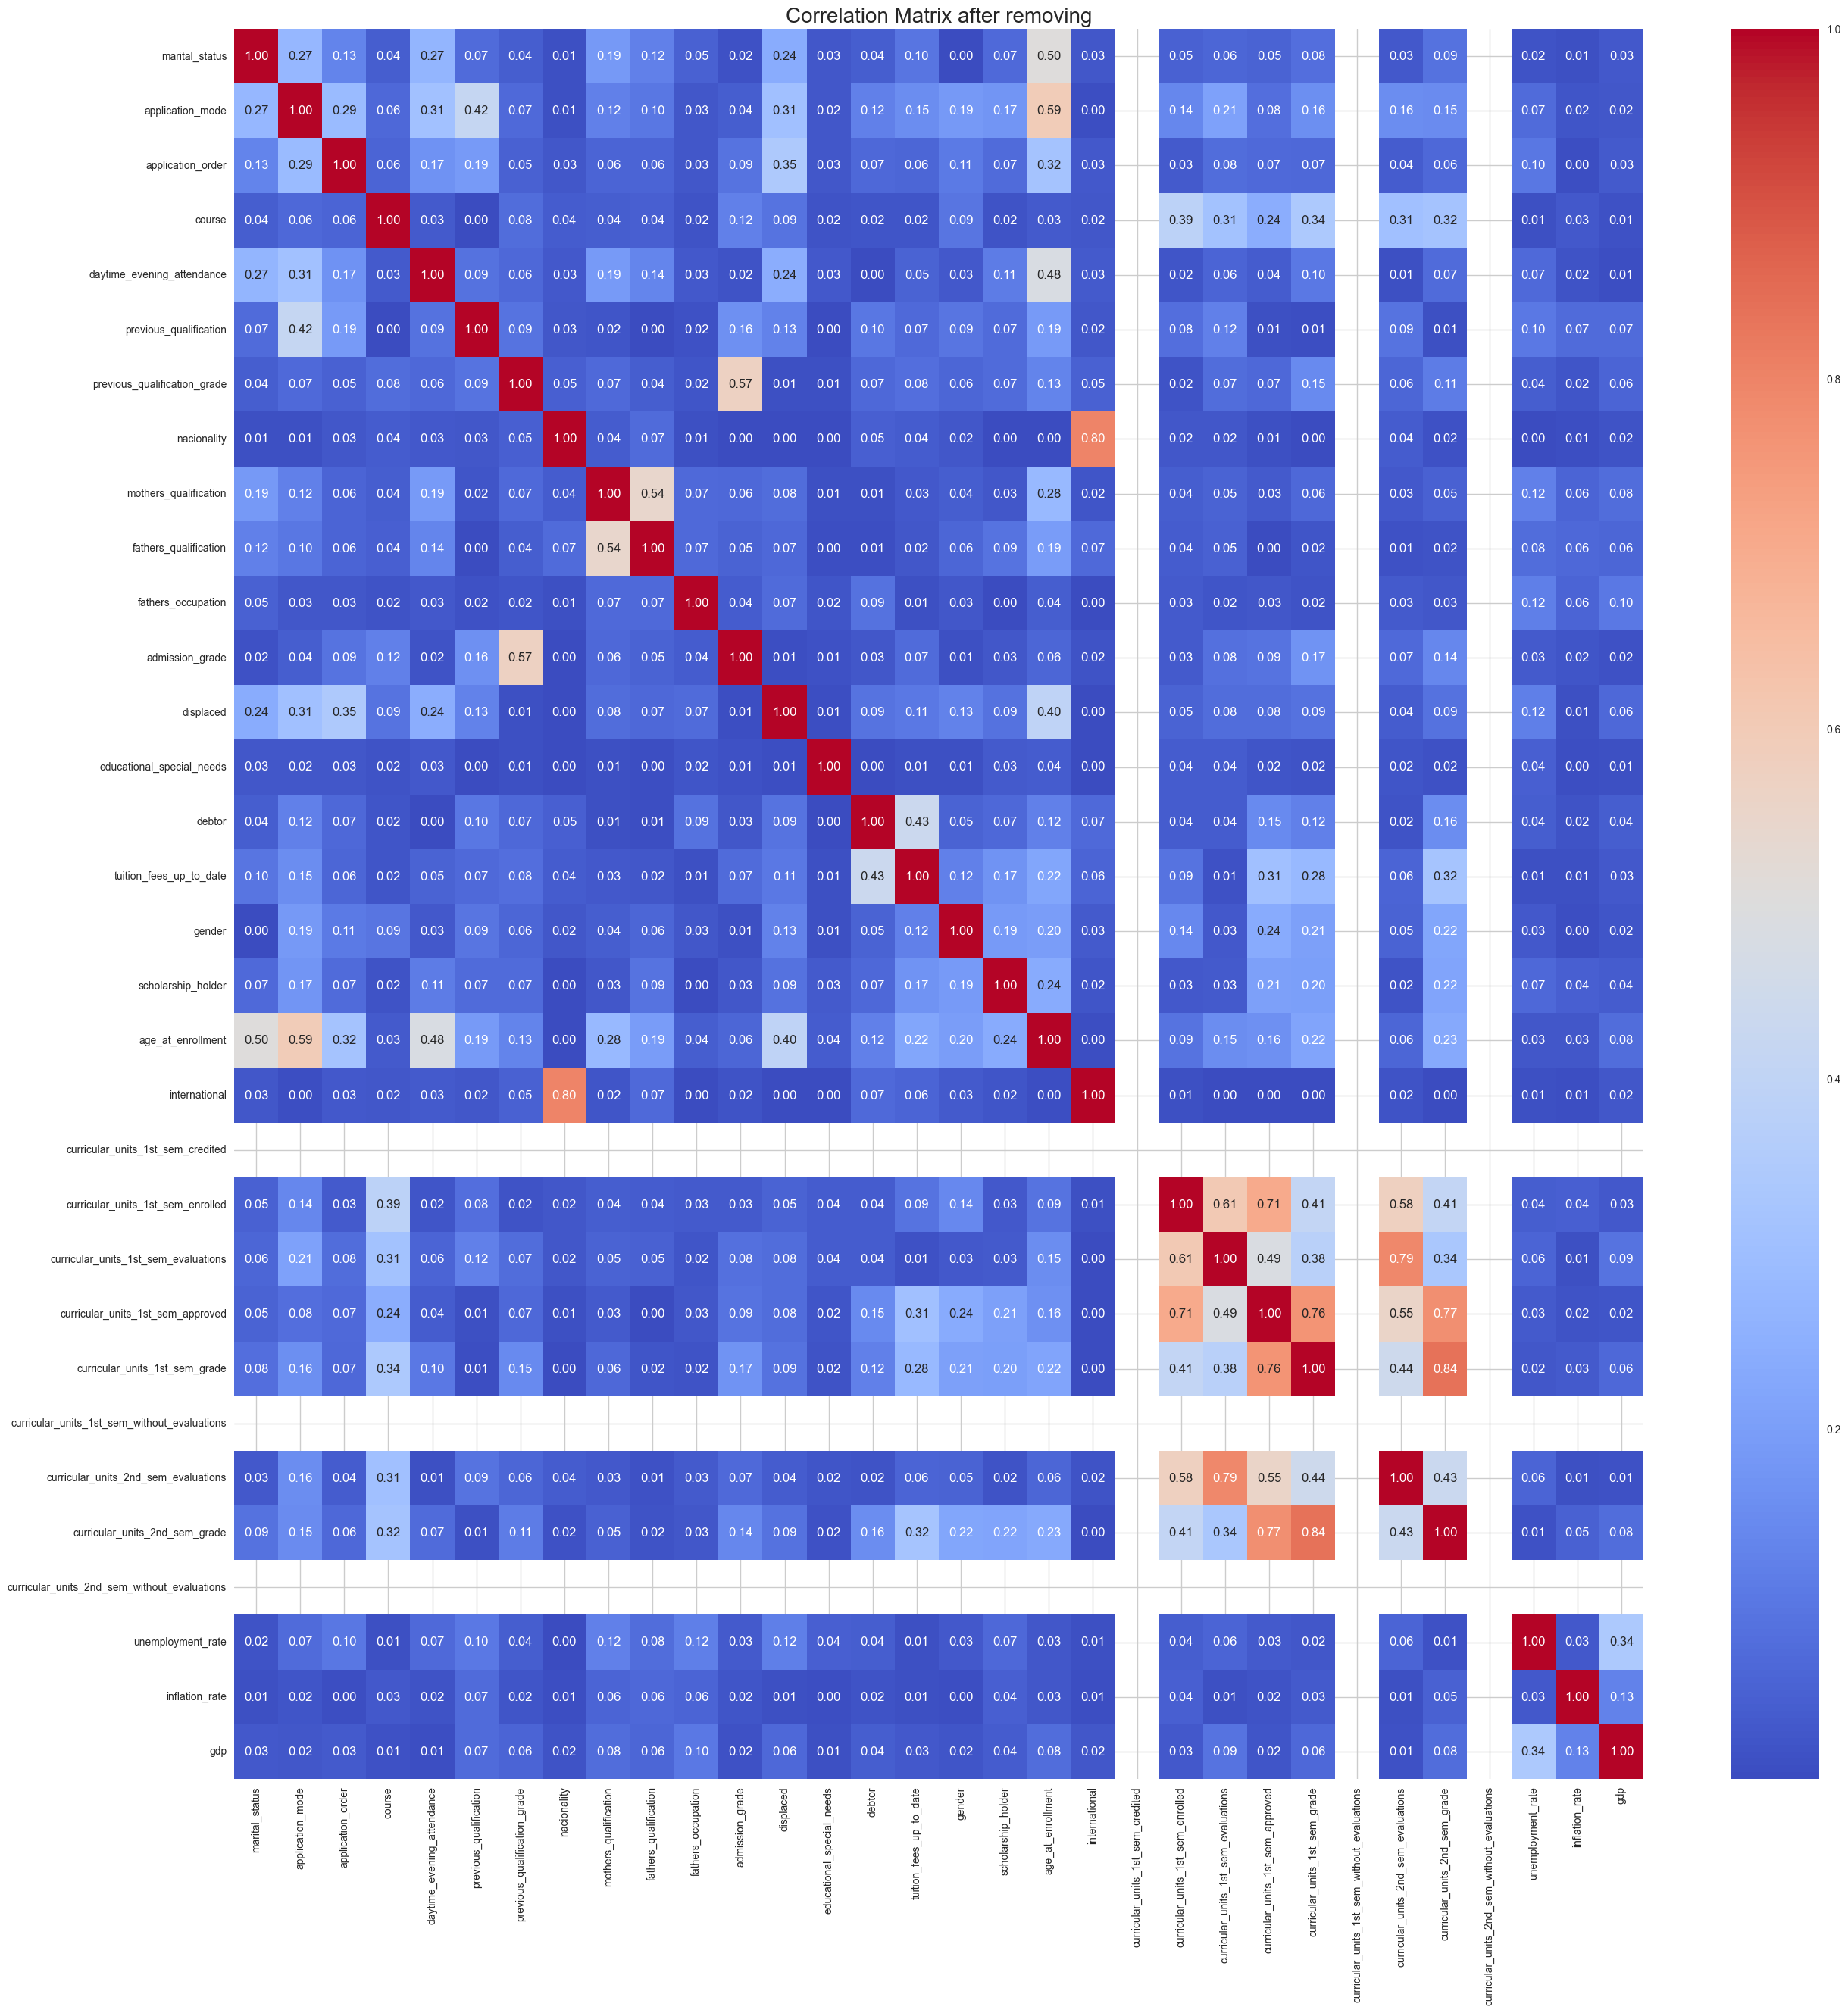

<Figure size 800x550 with 0 Axes>

In [687]:
# Correlation Matrix

correlation_matrix = df.drop('target',axis=1).corr().abs()
# Display the correlation matrix
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix after removing", fontsize="20")
plt.show()

plt.savefig("./images/Correlation_Matrix_after_removing.png")

### Features treatment

In [688]:
# Encode target values

le = LabelEncoder()
df['target'] = le.fit_transform(df.target)
df['target'].unique()

array([0, 1])

In [689]:
# Normalize features 

scaler =  StandardScaler()
X_features = scaler.fit_transform(df.drop('target',axis=1))
X_features

array([[-0.30068558, -0.08191671,  2.4368225 , ..., -0.31131218,
         0.12161459,  0.77411864],
       [-0.30068558, -0.19714928, -0.56247077, ...,  0.85091858,
        -1.10607007,  0.35370412],
       [-0.30068558, -1.00377727,  2.4368225 , ..., -0.31131218,
         0.12161459,  0.77411864],
       ...,
       [-0.30068558, -1.00377727, -0.56247077, ...,  0.85091858,
        -1.10607007,  0.35370412],
       [-0.30068558, -1.00377727, -0.56247077, ..., -0.83619059,
        -1.46715379, -1.37663355],
       [-0.30068558, -0.4852307 , -0.56247077, ...,  0.4010228 ,
         1.78259971, -0.74822447]])

In [690]:
# Define X and y values

X = X_features
y = np.array(df['target'])

## Oversampling using SMOTE

From our Analysis, we could see that our selected dataset is imbalanced. 
So we are going to fix imbalance issues by oversampling the minority classes using SMOTE.

In [691]:
# Defining Smote for oversampling

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, df['target'])

## ratio of 50% 50% its too risk

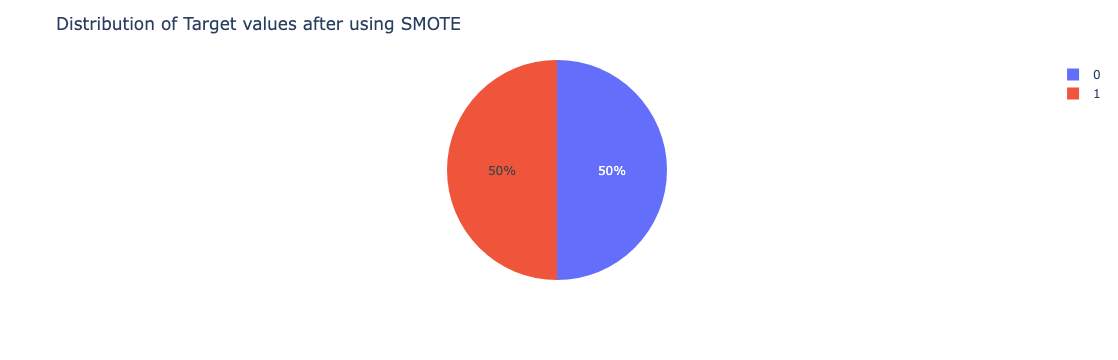

In [692]:
# Distribution of target values after using SMOTE

target_value_counts = y_resampled.value_counts()

distribution = px.pie(values=target_value_counts,
                      names=target_value_counts.index.to_list())

distribution.update_layout(
    title="Distribution of Target values after using SMOTE")
distribution.show()

# Saving the plot
distribution.write_image("./images/Distribution_of_Target_values_after_SMOTE.png")

## Train Test Split

In [693]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.20, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2904, 32)
(726, 32)
(2904,)
(726,)


In [694]:
X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test = train_test_split(
    X_resampled, y_resampled, test_size=0.20, random_state=42)

print(X_resampled_train.shape)
print(X_resampled_test.shape)
print(y_resampled_train.shape)
print(y_resampled_test.shape)

(3534, 32)
(884, 32)
(3534,)
(884,)


## Baseline Model Accuracy

In [695]:
# Create baseline for model prediction

#https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)

df_dummy_prediction = pd.DataFrame({
    'Label': y_test,
    'Prediction': y_pred
})

# Print the DataFrame
df_dummy_prediction

Label  Prediction
0        1           1
1        0           1
2        0           1
3        1           1
4        0           1
..     ...         ...
721      1           1
722      1           1
723      1           1
724      1           1
725      0           1

[726 rows x 2 columns]

In [696]:
accuracy_dummy_classifier = accuracy_score(y_test, y_pred)
print(f"Dummy Classifier Accuracy:",accuracy_dummy_classifier)

Dummy Classifier Accuracy: 0.6184573002754821


##### Creating a performance baseline for model benchmarking, with an accuracy score of 61% to beat

# Decision Tree 

### Max Depth Error evaluation

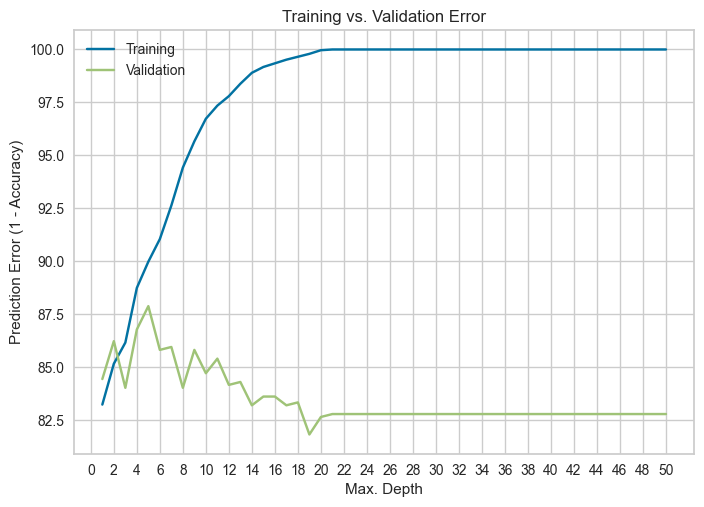

In [697]:
def max_depth_error(max_depths):
    model = DecisionTreeClassifier(max_depth=max_depths, random_state=42)
    model.fit(X_train, y_train)
    training_accuracy = model.score(X_train, y_train)*100
    validation_accuracy = model.score(X_test, y_test)*100
    return {"Max Depth": max_depths, "Training Accuracy": training_accuracy, "Validation Accuracy": validation_accuracy}


max_depth_Df = pd.DataFrame([max_depth_error(md) for md in range(1, 51)])

plt.figure()
plt.plot(max_depth_Df['Max Depth'], max_depth_Df['Training Accuracy'])
plt.plot(max_depth_Df['Max Depth'], max_depth_Df['Validation Accuracy'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0, 51, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

plt.savefig("./images/Decision_tree_Training_vs_Validation_Error.png")


In [698]:
'''# Splitting dataset in 80-20  
# Training set is 80% of total data 
# Combined set of testing & validation is  
# 20% of total data 
x_train, x_Combine, y_train, y_Combine = train_test_split(X,y, 
                                              train_size=0.8, 
                                              random_state=42) 
  
# Splitting combined dataset in 50-50 fashion .i.e.  
# Testing set is 50% of combined dataset 
# Validation set is 50% of combined dataset 
x_val, x_test, y_val, y_test = train_test_split(x_Combine, 
                                                y_Combine, 
                                                test_size=0.5, 
                                                random_state=42)'''

'# Splitting dataset in 80-20  \n# Training set is 80% of total data \n# Combined set of testing & validation is  \n# 20% of total data \nx_train, x_Combine, y_train, y_Combine = train_test_split(X,y, \n                                              train_size=0.8, \n                                              random_state=42) \n  \n# Splitting combined dataset in 50-50 fashion .i.e.  \n# Testing set is 50% of combined dataset \n# Validation set is 50% of combined dataset \nx_val, x_test, y_val, y_test = train_test_split(x_Combine, \n                                                y_Combine, \n                                                test_size=0.5, \n                                                random_state=42)'

In [699]:
'''# https://www.geeksforgeeks.org/how-decision-tree-depth-impact-on-the-accuracy/

def max_depth_error(max_depths):
    model = DecisionTreeClassifier(max_depth=max_depths, random_state=42)
    model.fit(X_train, y_train)
    training_accuracy = model.score(X_train, y_train)*100
    validation_accuracy = model.score(x_val, y_val)*100
    return {"Max Depth": max_depths, "Training Accuracy": training_accuracy, "Validation Accuracy": validation_accuracy}


max_depth_Df = pd.DataFrame([max_depth_error(md) for md in range(1, 51)])

plt.figure()
plt.plot(max_depth_Df['Max Depth'], max_depth_Df['Training Accuracy'])
plt.plot(max_depth_Df['Max Depth'], max_depth_Df['Validation Accuracy'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0, 51, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

plt.savefig("./images/Decision_tree_Training_vs_Validation_Error.png")'''

'# https://www.geeksforgeeks.org/how-decision-tree-depth-impact-on-the-accuracy/\n\ndef max_depth_error(max_depths):\n    model = DecisionTreeClassifier(max_depth=max_depths, random_state=42)\n    model.fit(X_train, y_train)\n    training_accuracy = model.score(X_train, y_train)*100\n    validation_accuracy = model.score(x_val, y_val)*100\n    return {"Max Depth": max_depths, "Training Accuracy": training_accuracy, "Validation Accuracy": validation_accuracy}\n\n\nmax_depth_Df = pd.DataFrame([max_depth_error(md) for md in range(1, 51)])\n\nplt.figure()\nplt.plot(max_depth_Df[\'Max Depth\'], max_depth_Df[\'Training Accuracy\'])\nplt.plot(max_depth_Df[\'Max Depth\'], max_depth_Df[\'Validation Accuracy\'])\nplt.title(\'Training vs. Validation Error\')\nplt.xticks(range(0, 51, 2))\nplt.xlabel(\'Max. Depth\')\nplt.ylabel(\'Prediction Error (1 - Accuracy)\')\nplt.legend([\'Training\', \'Validation\'])\n\nplt.savefig("./images/Decision_tree_Training_vs_Validation_Error.png")'

In [700]:
DT_clf = DecisionTreeClassifier(max_depth=5, random_state=42) 

# Train Decision Tree Classifer
DT_clf = DT_clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = DT_clf.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8787878787878788


### Hyperparameter Tuning with GridSearchCV

In [701]:
model = DecisionTreeClassifier()

# Definition of parameters
param_grid = {
    'max_depth': [2,3,4,5,6],
    'min_samples_split': [4,5,6,10],
    'criterion': ['gini', 'entropy']
}

g_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

g_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_split': [4, 5, 6, 10]},
             scoring='accuracy')

In [702]:
# Show Grid Search parameters

g_search.cv_results_['params']

[{'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 4},
 {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 5},
 {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 6},
 {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 10},
 {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 4},
 {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 5},
 {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 6},
 {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 10},
 {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 4},
 {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 5},
 {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 6},
 {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 10},
 {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 4},
 {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5},
 {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 6},
 {'criterion': 'gini', 'max_depth': 5

In [703]:
# Define  best estimator from the grid search
best_dtree_reg = g_search.best_estimator_ 
y_pred = best_dtree_reg.predict(X_test)

In [704]:
# Show best hyperparameters and accuracy

print("Best Hyperparameters:", g_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}
Best Score: 0.8991067719152472


In [737]:
# Model evaluation

DT_clf = DecisionTreeClassifier(max_depth=5,min_samples_split=10,criterion='entropy') 

DT_clf = DT_clf.fit(X_train, y_train)

y_pred = DT_clf.predict(X_test)

decison_tree_accuracy = metrics.accuracy_score(y_test, y_pred)

print("Accuracy:", decison_tree_accuracy)

Accuracy: 0.8801652892561983


              precision    recall  f1-score   support

           0       0.85      0.77      0.81       277
           1       0.87      0.92      0.89       449

    accuracy                           0.86       726
   macro avg       0.86      0.84      0.85       726
weighted avg       0.86      0.86      0.86       726



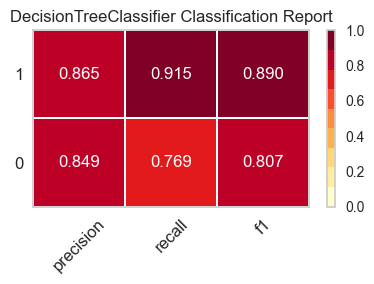

<Axes: title={'center': 'DecisionTreeClassifier Classification Report'}>

In [706]:
# Show classification report results

print(classification_report(y_test, y_pred))

#https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html

fig, ax = plt.subplots(figsize=(4,3)) 
viz = ClassificationReport(DT_clf)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

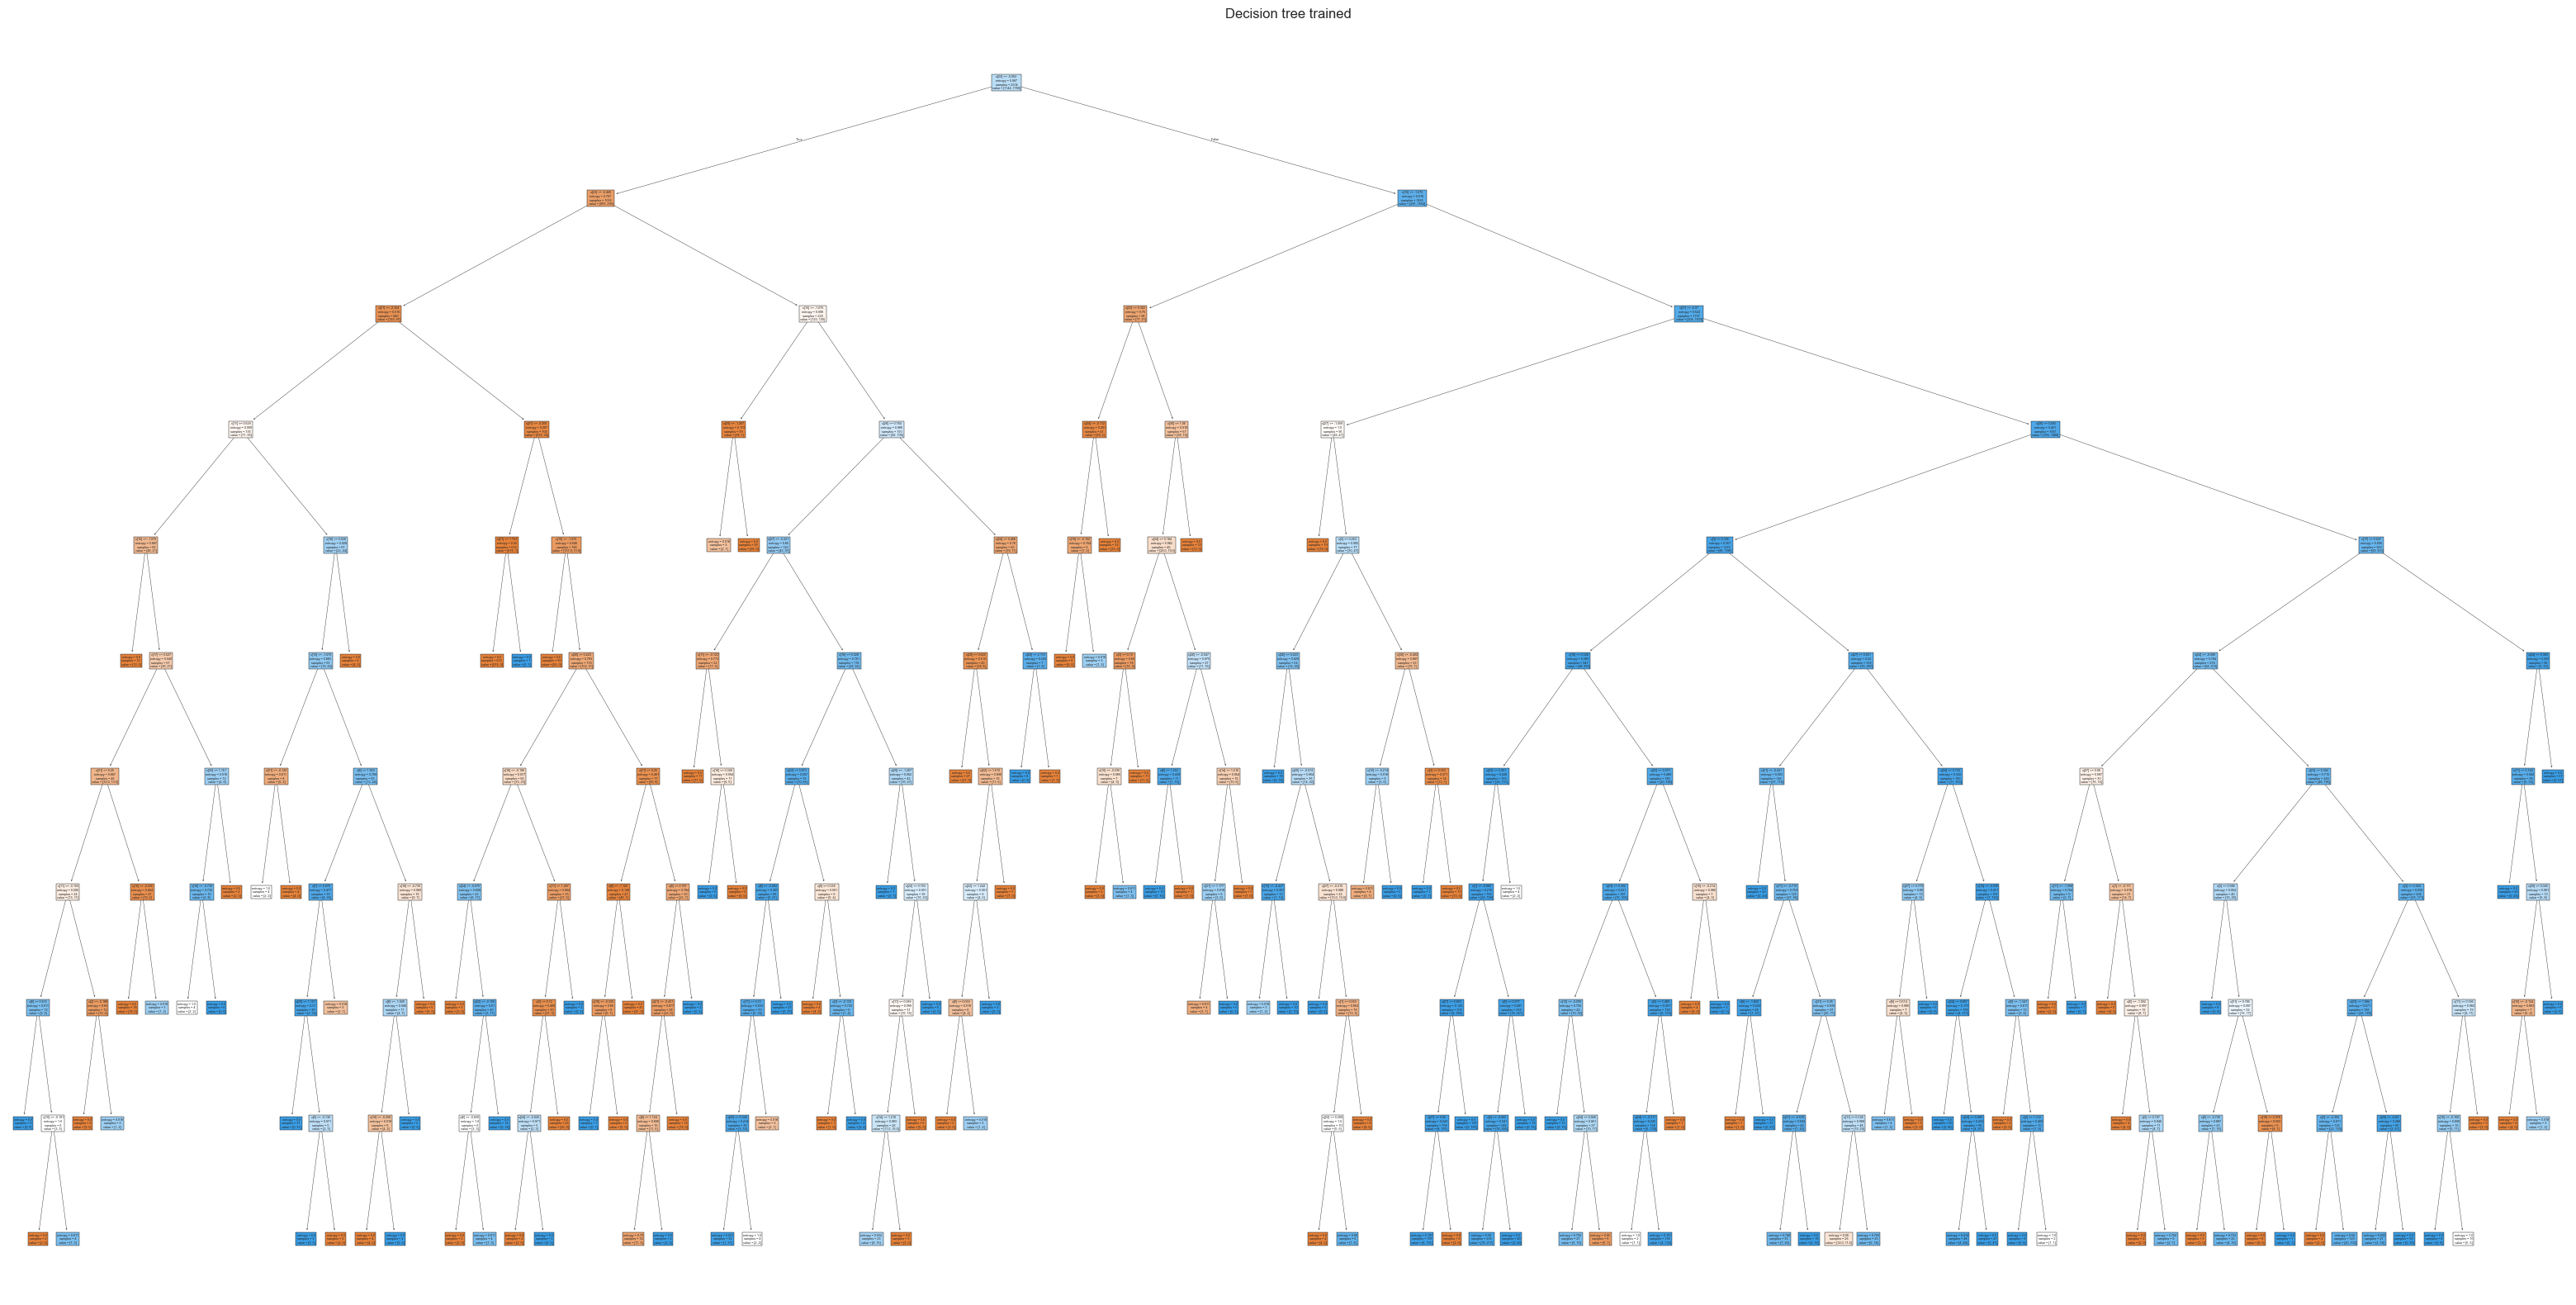

<Figure size 800x550 with 0 Axes>

In [707]:
# Plot the decision tree

# https://mljar.com/blog/visualize-decision-tree/

plt.figure(figsize=(40, 20))

tree.plot_tree(DT_clf,filled=True)

plt.title("Decision tree trained")
plt.show()
plt.savefig("./images/Decision_Tree_Plot.png")

In [708]:
"""
Defining a function to plot Confusion Matrix. 
"""

def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    return plt

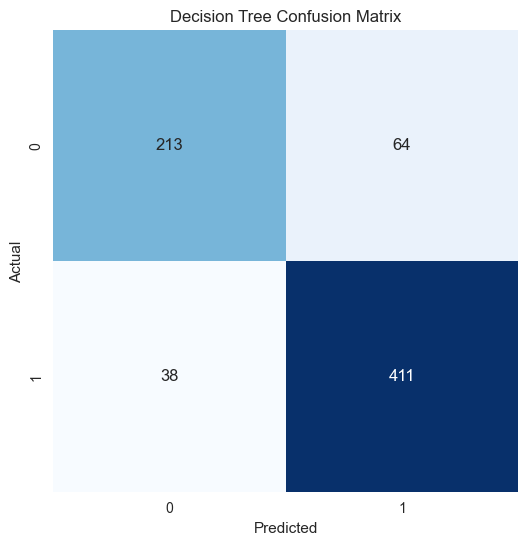

<Figure size 800x550 with 0 Axes>

In [709]:
""" 
Plotting the Confusion Matrix for Decision Tree Classifier.
"""

DT_CM_plot = plot_confusion_matrix(y_test, y_pred, 'Decision Tree Confusion Matrix')
DT_CM_plot.show()

# Saving the plot
DT_CM_plot.savefig("./images/Decision_Tree_Confusion_Matrix.png")

In [710]:
""" 
Defining a function to get feature importance of tree based models.
"""

def important_features(model, title):
    # Get feature importances
    importances = model.feature_importances_

    # Create a dataframe for plotting purposes
    importance_df = pd.DataFrame({
        'Feature': df.columns[:-1],
        'Importance': importances
    }).sort_values(by='Importance', ascending=True)

    # Plot the important features using horizontal bar plot
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'])
    plt.title(title)
    plt.xlabel('Importance')
    plt.ylabel('Features')

    return plt

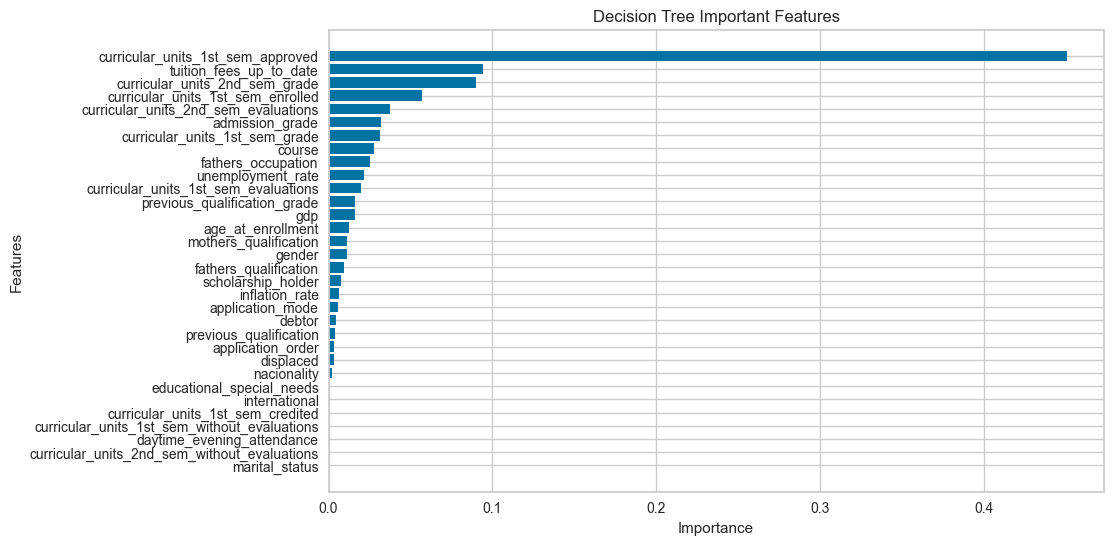

<Figure size 800x550 with 0 Axes>

In [711]:
# Plotting the important features for Decision Tree Classifier
DT_important_features_plot = important_features(DT_clf, 'Decision Tree Important Features')
DT_important_features_plot.show()

# Saving the plot
DT_important_features_plot.savefig("./images/Decision_Tree_Important_Features.png")

In [712]:
selected_columns = [
    "curricular_units_1st_sem_approved",
    "tuition_fees_up_to_date",
    "curricular_units_2nd_sem_grade",
    "curricular_units_1st_sem_enrolled",
    "curricular_units_2nd_sem_evaluations"
]

X_sorted = df[selected_columns].copy()

X_selected_train, X_selected_test, y_selected_train, y_selected_test = train_test_split(
    X_sorted, df['target'], test_size=0.20, random_state=42)

print(X_selected_train.shape)
print(X_selected_test.shape)
print(y_selected_test.shape)
print(y_selected_test.shape)

(2904, 5)
(726, 5)
(726,)
(726,)


In [713]:
def model_best_approch(model, X_train, y_train, X_test, y_test):
    # model = DecisionTreeClassifier(max_depth=5, random_state=42)
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    return train_accuracy, test_accuracy

In [714]:
model = DecisionTreeClassifier(
    max_depth=5, min_samples_split=6, criterion='entropy')

training_accuracy, testing_accuracy = model_best_approch(model,
                                                         X_train, y_train, X_test, y_test)

resampled_training_accuracy, resampled_testing_accuracy = model_best_approch(model,
                                                                             X_resampled_train, y_resampled_train, X_resampled_test, y_resampled_test)

selected_training_accuracy, selected_testing_accuracy = model_best_approch(model,
                                                                           X_selected_train, y_selected_train, X_selected_test, y_selected_test)

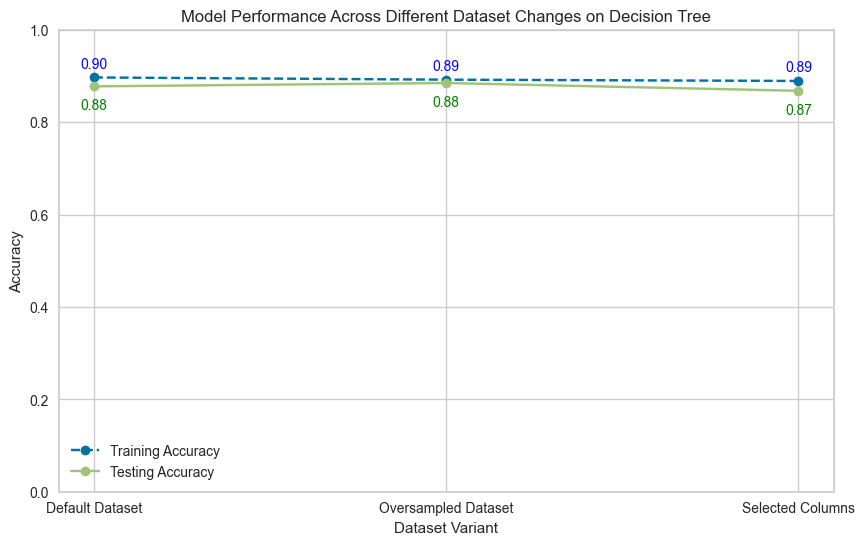

<Figure size 800x550 with 0 Axes>

In [715]:
# Plotting the accuracies
categories = ['Default Dataset', 'Oversampled Dataset', 'Selected Columns']
train_accuracies = [training_accuracy,
                    resampled_training_accuracy, selected_training_accuracy]
test_accuracies = [testing_accuracy,
                   resampled_testing_accuracy, selected_testing_accuracy]

plt.figure(figsize=(10, 6))
plt.plot(categories, train_accuracies,
         label="Training Accuracy", marker='o', linestyle='--')
plt.plot(categories, test_accuracies,
         label="Testing Accuracy", marker='o', linestyle='-')
for i, (train_acc, test_acc) in enumerate(zip(train_accuracies, test_accuracies)):
    plt.text(categories[i], train_acc + 0.02,
             f"{train_acc:.2f}", ha='center', fontsize=10, color='blue')  # Training
    plt.text(categories[i], test_acc - 0.05,
             f"{test_acc:.2f}", ha='center', fontsize=10, color='green')  # Testing
plt.title('Model Performance Across Different Dataset Changes on Decision Tree')
plt.xlabel('Dataset Variant')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.legend()
plt.grid(True)
plt.show()

plt.savefig("./images/Model_Performance_Across_Different_Dataset_Changes_on_Decision_Tree.png")

## Random Forest 

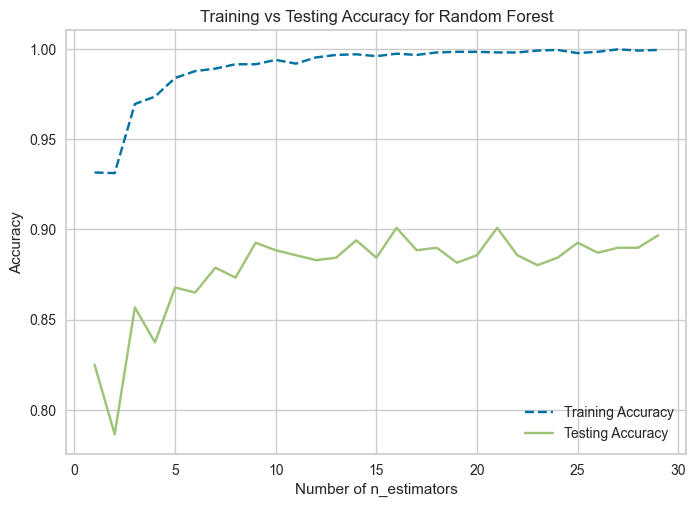

<Figure size 800x550 with 0 Axes>

In [716]:
""" 
Examining the accuracy of the Random Forest model over a range of estimators.
Accuracy is caluculated for training and testing data.
"""

# Flags to store accuracy data
training_accuracy = []
testing_accuracy = []
nums = []

# Loop through the defined range of estimators
for i in range(1,30):
    rf_model = RandomForestClassifier(n_estimators=i,criterion="entropy") # Random Forest model
    rf_model.fit(X_train, y_train) # training the model

    # Training accuracy
    y_train_pred = rf_model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    training_accuracy.append(train_accuracy)

   # Testing accuracy
    y_test_pred = rf_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    testing_accuracy.append(test_accuracy)

    nums.append(i)
    
# Plot both training and testing accuracy
plt.plot(nums, training_accuracy, label="Training Accuracy", linestyle='--')
plt.plot(nums, testing_accuracy, label="Testing Accuracy", linestyle='-')
plt.xlabel("Number of n_estimators")
plt.ylabel("Accuracy")
plt.title("Training vs Testing Accuracy for Random Forest")
plt.legend()
plt.show()

plt.savefig("./images/Training_vs_Testing_Accuracy_for_Random_Forest.png")

In [717]:
# Randon Forest model and prediction applying estimators

rf_model = RandomForestClassifier(n_estimators=10)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print(f'Random Forest Accuracy:', metrics.accuracy_score(y_test, y_pred))

Random Forest Accuracy: 0.8760330578512396


### Hyperparameter Tuning with RandomSearchCV

In [718]:
param_grid = { 
    'n_estimators': [5,10,15, 20], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
} 

random_forest_search = RandomizedSearchCV(RandomForestClassifier(), 
                                   param_grid) 
random_forest_search.fit(X_train, y_train) 
print(random_forest_search.best_estimator_)
print("Best Accuracy (CV):",random_forest_search.best_score_)

RandomForestClassifier(max_depth=6, max_features='log2', max_leaf_nodes=9,
                       n_estimators=20)
Best Accuracy (CV): 0.8749967357113182


In [719]:
# Model evaluation 

rf_model = RandomForestClassifier(max_depth=6, max_leaf_nodes=9, max_features=None)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

RF_accuracy = metrics.accuracy_score(y_test, y_pred)

print(f'Random Forest Accuracy:', RF_accuracy)

Random Forest Accuracy: 0.8746556473829201


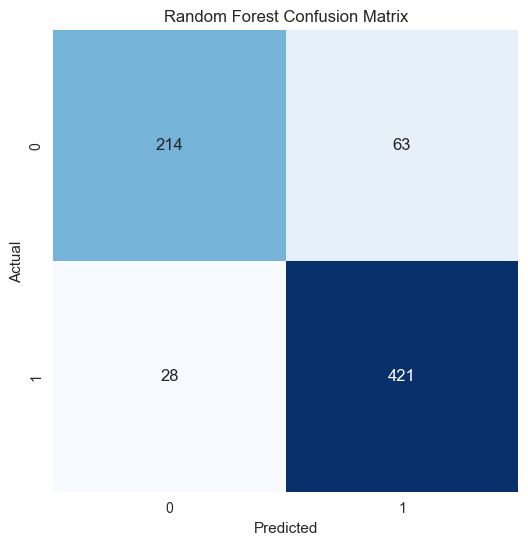

<Figure size 800x550 with 0 Axes>

In [720]:
""" 
Plotting the Confusion Matrix for Random Forest Classifier.
"""

RF_CM_plot = plot_confusion_matrix(
    y_test, y_pred, 'Random Forest Confusion Matrix')
RF_CM_plot.show()

# Saving the plot
RF_CM_plot.savefig("./images/Random_forest_Confusion_Matrix.png")

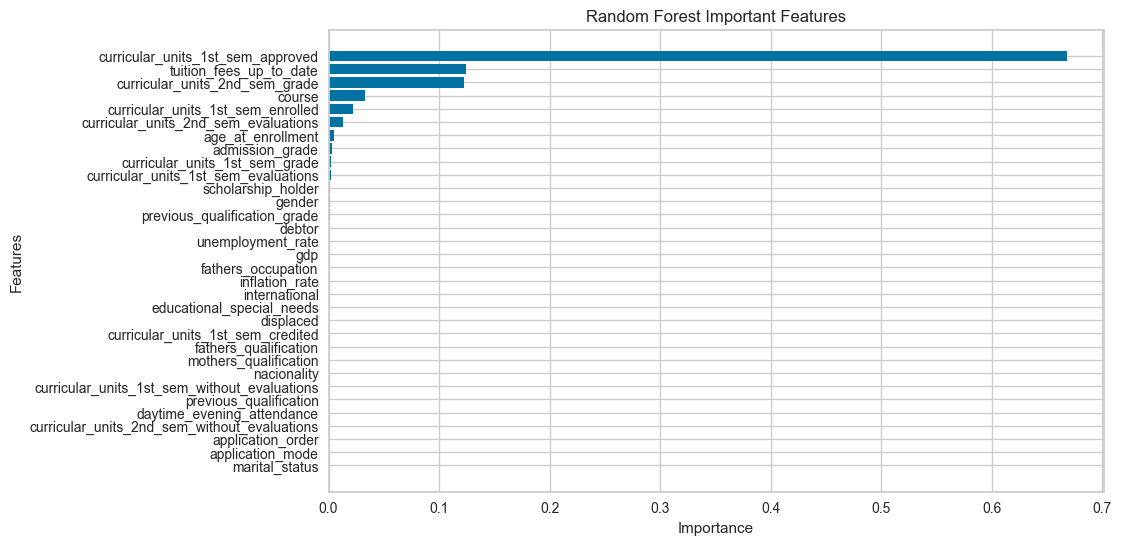

<Figure size 800x550 with 0 Axes>

In [721]:
# Plotting the important features for Random Forest Classifier
RF_important_features_plot = important_features(
    rf_model, 'Random Forest Important Features')
RF_important_features_plot.show()

# Saving the plot
RF_important_features_plot.savefig("./images/Random_Forest_Important_Features.png")

In [722]:
model = RandomForestClassifier(
    max_depth=6, max_leaf_nodes=9, max_features=None)

rf_training_accuracy, rf_testing_accuracy = model_best_approch(model,
                                                         X_train, y_train, X_test, y_test)

rf_resampled_training_accuracy, rf_resampled_testing_accuracy = model_best_approch(model,
                                                                             X_resampled_train, y_resampled_train, X_resampled_test, y_resampled_test)

rf_selected_training_accuracy, rf_selected_testing_accuracy = model_best_approch(model,
                                                                           X_selected_train, y_selected_train, X_selected_test, y_selected_test)

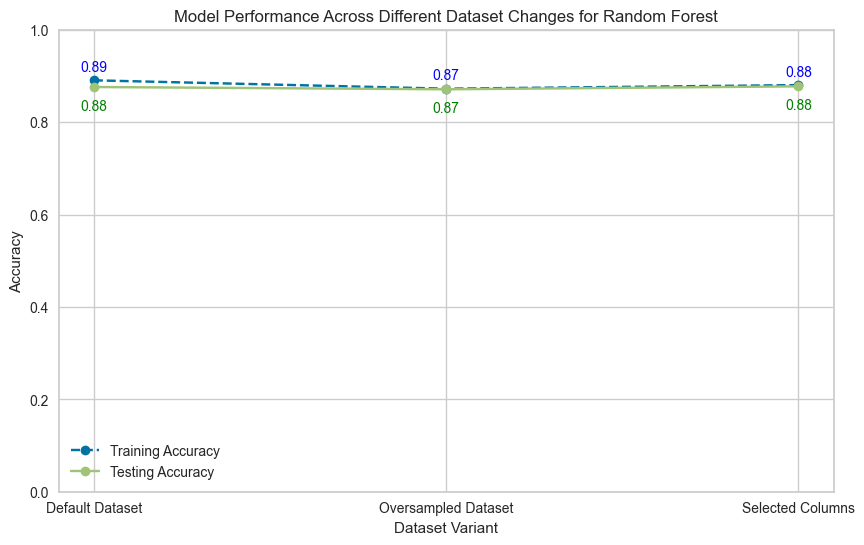

<Figure size 800x550 with 0 Axes>

In [723]:
# Plotting the accuracies
categories = ['Default Dataset', 'Oversampled Dataset', 'Selected Columns']
train_accuracies = [rf_training_accuracy,
                    rf_resampled_training_accuracy, rf_selected_training_accuracy]
test_accuracies = [rf_testing_accuracy,
                   rf_resampled_testing_accuracy, rf_selected_testing_accuracy]

plt.figure(figsize=(10, 6))
plt.plot(categories, train_accuracies,
         label="Training Accuracy", marker='o', linestyle='--')
plt.plot(categories, test_accuracies,
         label="Testing Accuracy", marker='o', linestyle='-')
for i, (train_acc, test_acc) in enumerate(zip(train_accuracies, test_accuracies)):
    plt.text(categories[i], train_acc + 0.02,
             f"{train_acc:.2f}", ha='center', fontsize=10, color='blue')  # Training
    plt.text(categories[i], test_acc - 0.05,
             f"{test_acc:.2f}", ha='center', fontsize=10, color='green')  # Testing
plt.title('Model Performance Across Different Dataset Changes for Random Forest')
plt.xlabel('Dataset Variant')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.legend()
plt.grid(True)
plt.show()

plt.savefig("./images/Model_Performance_Across_Different_Dataset_Changes_for_Random_Forest.png")

## SVM Model

### Hyperparameter tuning using GridSearchCV

In [724]:
svm_model = SVC()

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'linear'}
Best Score: 0.8991067719152472


In [725]:
model = SVC(kernel='linear', C=10, gamma=1)

svm_training_accuracy, svm_testing_accuracy = model_best_approch(model,
                                                               X_train, y_train, X_test, y_test)

svm_resampled_training_accuracy, svm_resampled_testing_accuracy = model_best_approch(model,
                                                                                   X_resampled_train, y_resampled_train, X_resampled_test, y_resampled_test)

svm_selected_training_accuracy, svm_selected_testing_accuracy = model_best_approch(model,
                                                                                 X_selected_train, y_selected_train, X_selected_test, y_selected_test)

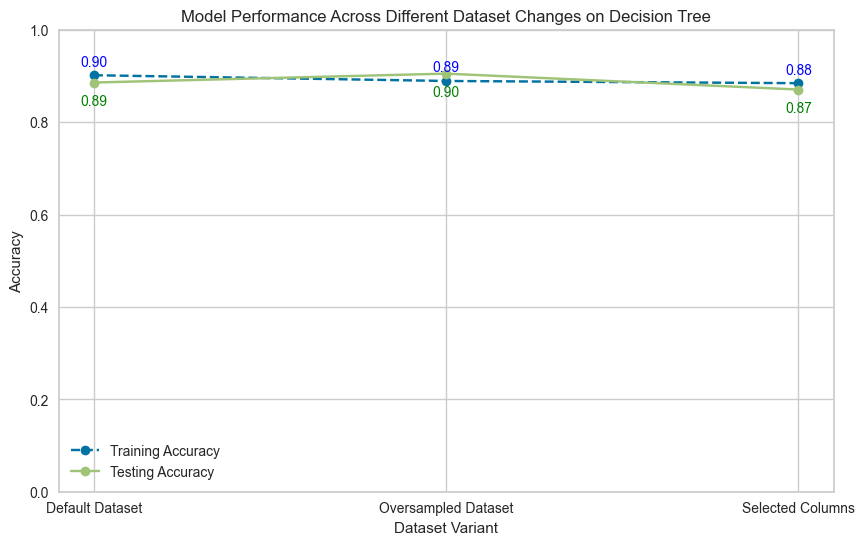

<Figure size 800x550 with 0 Axes>

In [726]:
# Plotting the accuracies
categories = ['Default Dataset', 'Oversampled Dataset', 'Selected Columns']
train_accuracies = [svm_training_accuracy,
                    svm_resampled_training_accuracy, svm_selected_training_accuracy]
test_accuracies = [svm_testing_accuracy,
                   svm_resampled_testing_accuracy, svm_selected_testing_accuracy]

plt.figure(figsize=(10, 6))
plt.plot(categories, train_accuracies,
         label="Training Accuracy", marker='o', linestyle='--')
plt.plot(categories, test_accuracies,
         label="Testing Accuracy", marker='o', linestyle='-')
for i, (train_acc, test_acc) in enumerate(zip(train_accuracies, test_accuracies)):
    plt.text(categories[i], train_acc + 0.02,
             f"{train_acc:.2f}", ha='center', fontsize=10, color='blue')  # Training
    plt.text(categories[i], test_acc - 0.05,
             f"{test_acc:.2f}", ha='center', fontsize=10, color='green')  # Testing
plt.title('Model Performance Across Different Dataset Changes on Decision Tree')
plt.xlabel('Dataset Variant')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.legend()
plt.grid(True)
plt.show()

plt.savefig("./images/Model_Performance_Across_Different_Dataset_Changes_on_Decision_Tree.png")

In [727]:
""" 
Defining best performing SVM model with hyperparameters.
"""
svm = SVC(kernel='linear', C=10, gamma=1)   # Defining the model

# Training the model
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test) # Predicting 

svm_accuracy = metrics.accuracy_score(y_test, y_pred)

print(f'SVM Accuracy:', svm_accuracy)

SVM Accuracy: 0.8856749311294766


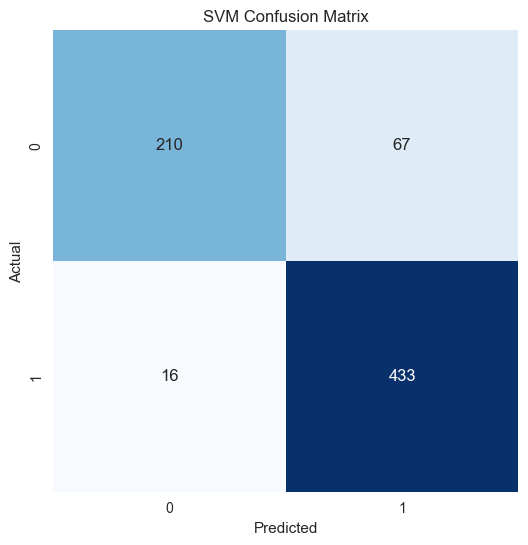

<Figure size 800x550 with 0 Axes>

In [728]:
""" 
Plotting the Confusion Matrix for SVM.
"""

SVM_CM_plot = plot_confusion_matrix(
    y_test, y_pred, 'SVM Confusion Matrix')
SVM_CM_plot.show()

# Saving the plot
SVM_CM_plot.savefig("./images/SVM_Confusion_Matrix.png")

## Neural Network

In [729]:
# Defining NN Layers

model = Sequential([
    # Input layer with 32 features
    Dense(64, activation='relu', input_shape=(32,)),
    Dropout(0.2),  # using dropout for regularization
    Dense(32, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Binary Classification so using sigmoid
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [730]:
# Compiling the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Loss for binary classification
    metrics=['accuracy']
)

In [731]:
# Summary of the model
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,225 (16.50 KB)

 Trainable params: 4,225 (16.50 KB)

 Non-trainable params: 0 (0.00 B)

In [732]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          
    restore_best_weights=True  
)

In [733]:
# Train the model 
NN_model = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    callbacks=[early_stopping]  # Add early stopping here
)

Epoch 1/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - accuracy: 0.6964 - loss: 0.5661
Epoch 2/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - accuracy: 0.8777 - loss: 0.3118
Epoch 3/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.8972 - loss: 0.2695
Epoch 4/100
  1/182 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6875 - loss: 0.5220

/opt/anaconda3/lib/python3.12/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning:

Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss



182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - accuracy: 0.8909 - loss: 0.2716
Epoch 5/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - accuracy: 0.9020 - loss: 0.2613
Epoch 6/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - accuracy: 0.8982 - loss: 0.2641
Epoch 7/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 0.8941 - loss: 0.2569
Epoch 8/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.9057 - loss: 0.2359
Epoch 9/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - accuracy: 0.9014 - loss: 0.2516
Epoch 10/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - accuracy: 0.9141 - loss: 0.2373
Epoch 11/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - accuracy: 0.9179 - loss: 0.2198
Epoch 12/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - accuracy: 0.9126 - loss: 0.2197
Epoch 13/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.9160 - loss: 0.2081
Epoch 14/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - accuracy: 0.9266 - loss: 0.2025
Epoch 15/100
182/182 ━━━━━━━

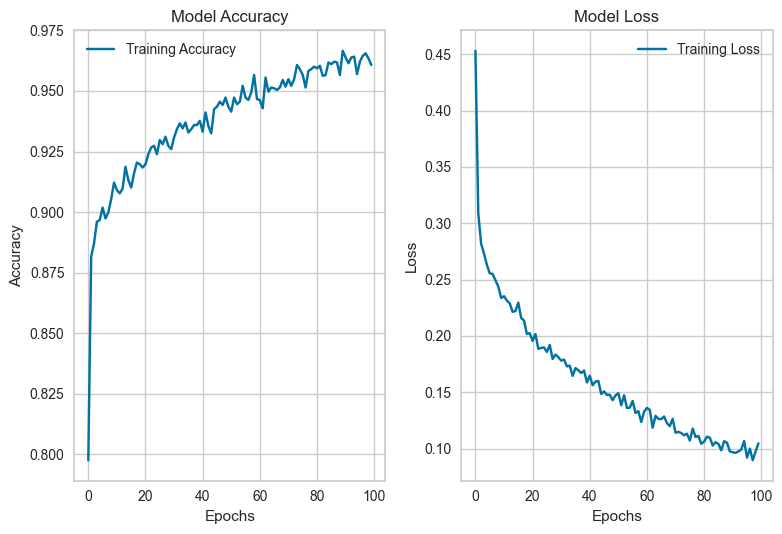

In [734]:
plt.subplot(1, 2, 1)
plt.plot(NN_model.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(NN_model.history['loss'], label='Training Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.savefig("./images/model_accuracy_and_loss.png")
plt.show()

In [735]:
NN_test_loss, NN_test_accuracy = model.evaluate(X_test, y_test, verbose=1)

print(f'Test Accuracy: {NN_test_accuracy}')

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.8937 - loss: 0.4837
Test Accuracy: 0.8925619721412659


## Classifiers Accuracy Comparison

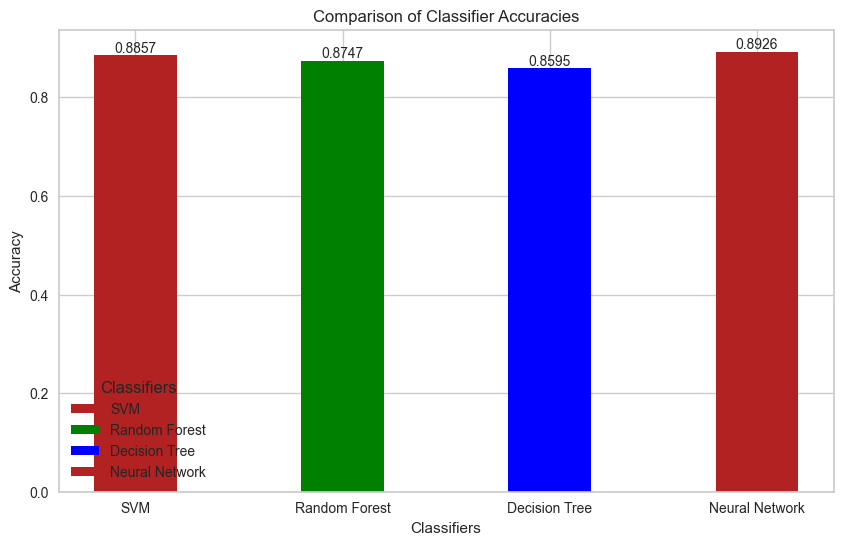

In [736]:
evaluation = ['SVM', 'Random Forest', 'Decision Tree', 'Neural Network']
accuracys = [svm_accuracy, RF_accuracy,
             decison_tree_accuracy, NN_test_accuracy]

colors = ['firebrick', 'green', 'blue']

plt.figure(figsize=(10, 6))

bar_width = 0.4

bars = plt.bar(evaluation, accuracys, color=colors, width=bar_width)

plt.xlabel('Classifiers')
plt.ylabel("Accuracy")
plt.title('Comparison of Classifier Accuracies')

plt.legend(bars, evaluation, title="Classifiers")

# Display the value of each bar on top with 4 decimal places
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.4f}',
             ha='center', va='bottom', fontsize=10)
plt.savefig("./images/classifiers_accuracy_comparison.png")
plt.show()